# NB: Getting Started with GGPlot2

Programming for Data Science

In this notebook, we look at GGPlot2, the specific graphics package associated with the Tidyverse.

It implements the logic of the grammar of graphics model described in the previous notebook.

# A First Plot

Everything starts with getting `ggplot()`, which is imported when you import `tidyverse`.

In [1]:
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


GGPlot gives lots of warning messages.

For sake of clarity, we are going to turn these off for now.

We're also going to the set the default size of our plots so they display better.

We do this with the `options()` function we saw earlier.

In [2]:
options(warn=-1)
options(repr.plot.width = 16, repr.plot.height = 10)

Here is a **basic graph** &mdash; a scatterplot comparing two features in the iris dataset. 

The functions and arguments are broken out so you can see how the grammar is implemented:

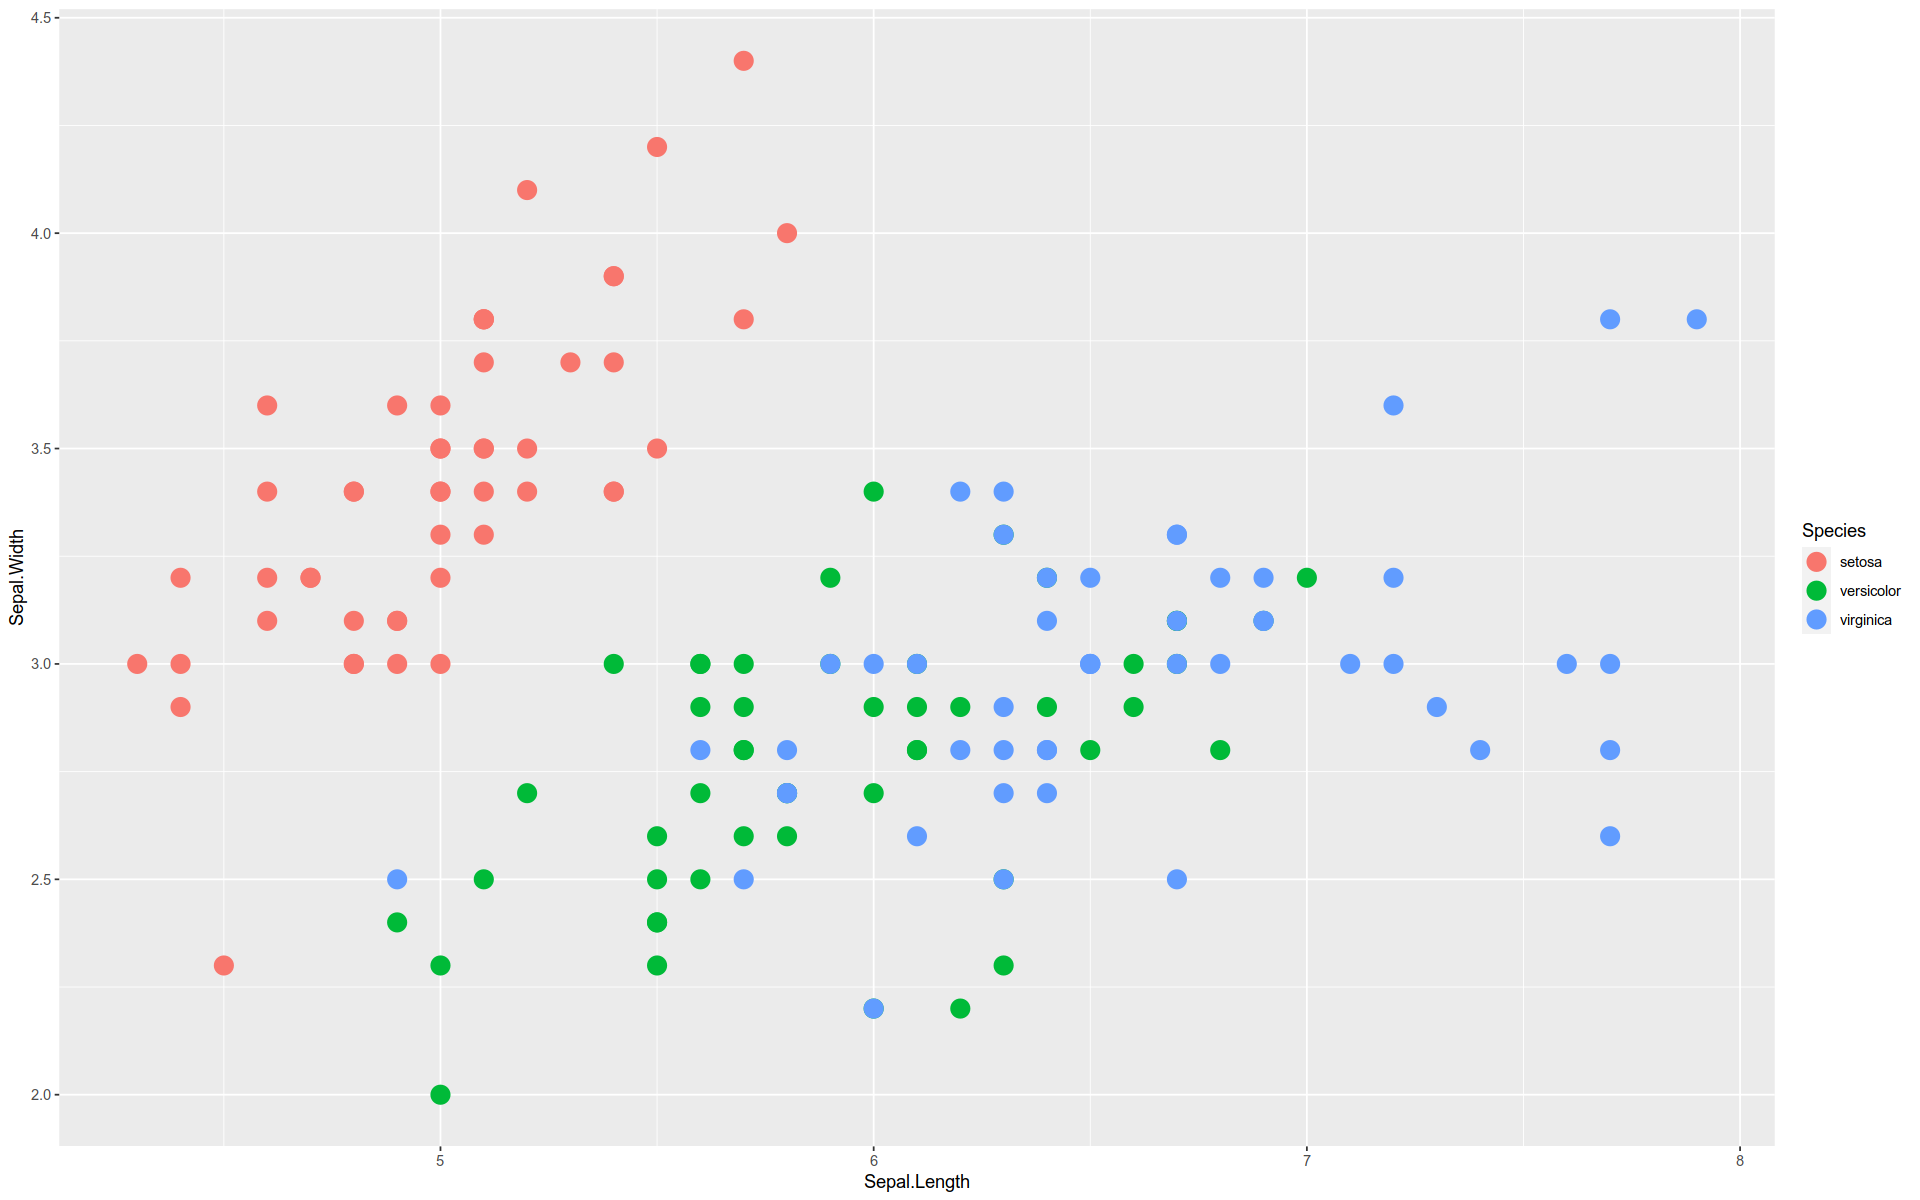

In [3]:
iris %>%
    ggplot(
        mapping = aes(x = Sepal.Length, y = Sepal.Width)
    ) + 
    geom_point(
        size = 5, 
        aes(color = Species)
    )

Here is an alternate way to build the graph:

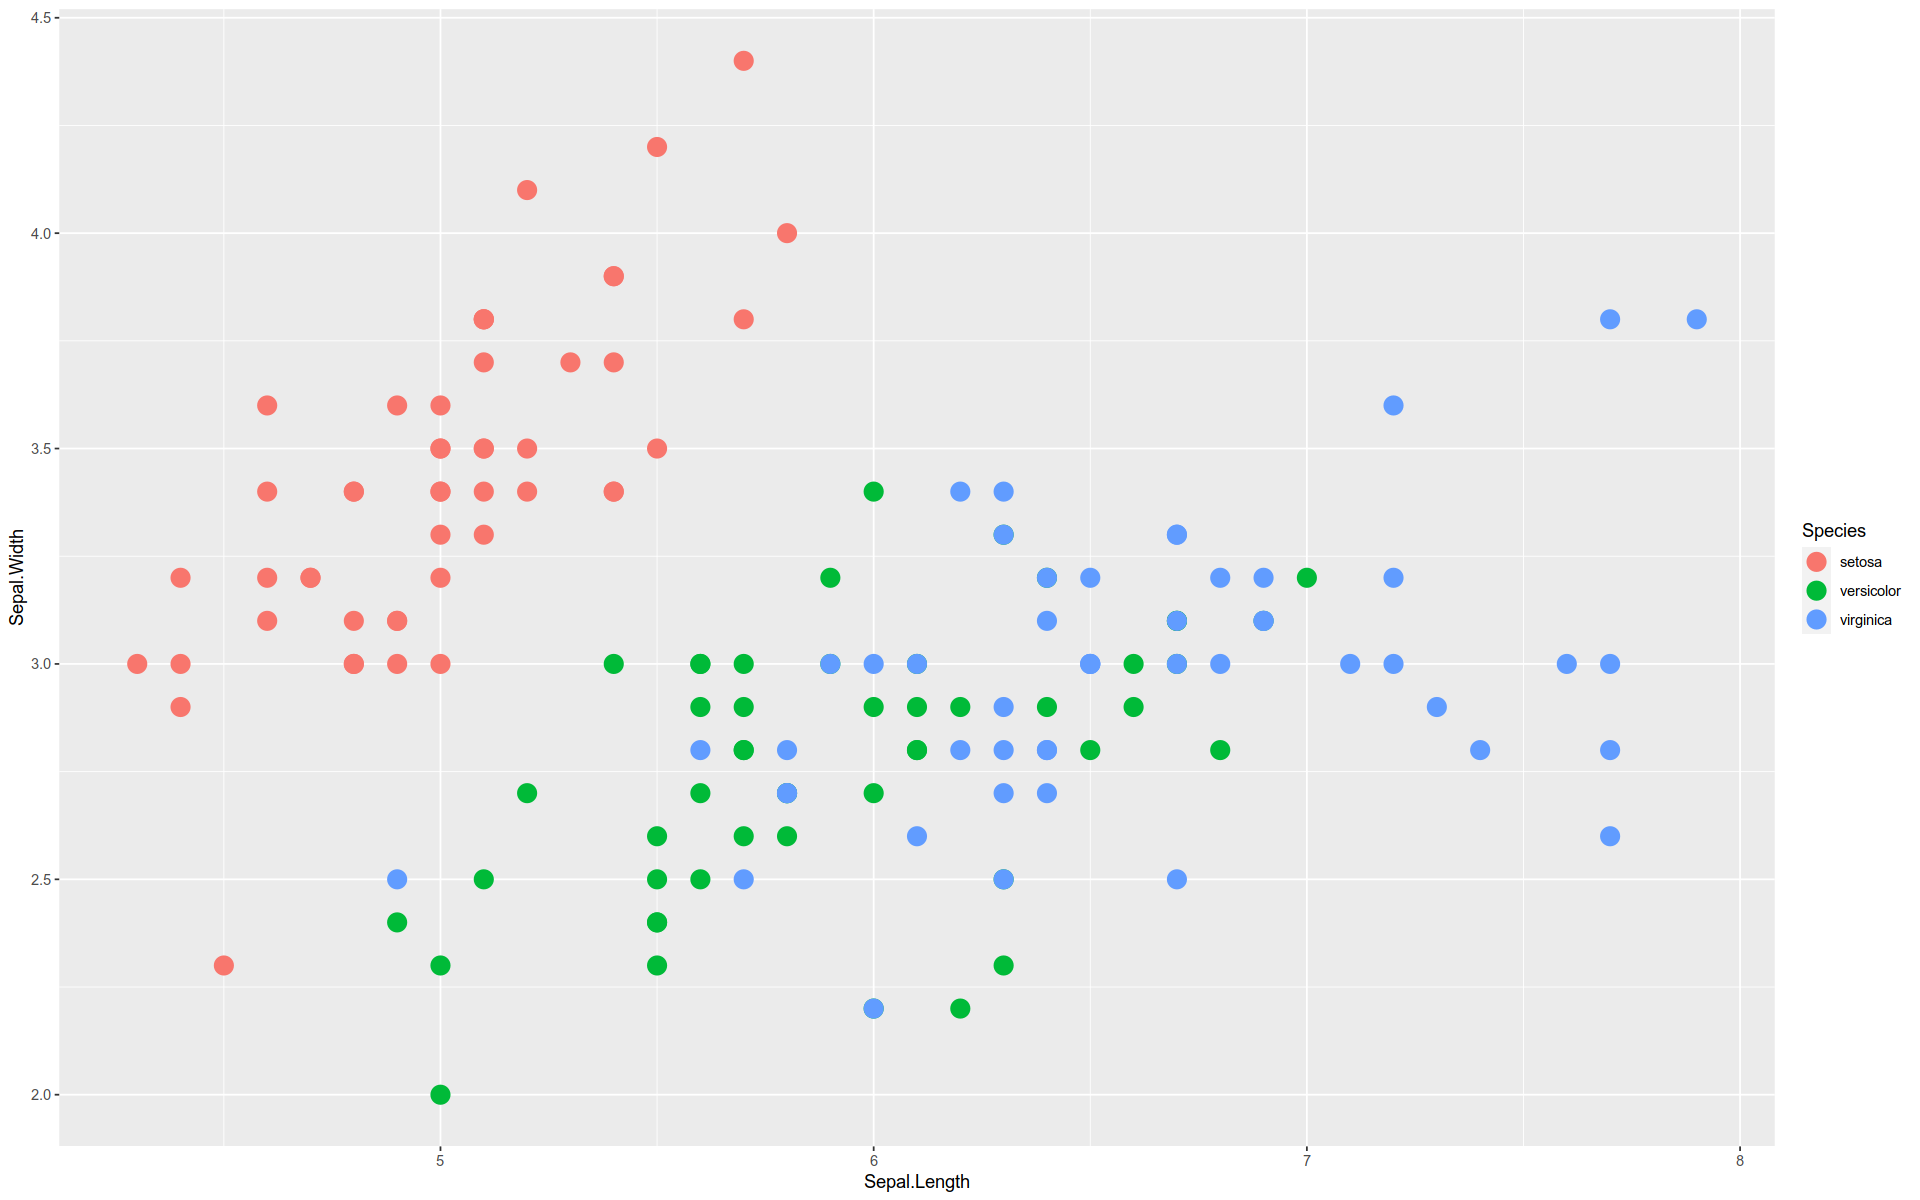

In [4]:
iris %>%
    ggplot() +
    aes(x = Sepal.Length, y = Sepal.Width) + 
    geom_point(size = 5) +
    aes(color = Species)

Note how we can pull the `aes()` functions out of the `geom_` and `mapping()` functions.

Note that to create a scatterplot, we did not use a function like `geom_scatterplot()`.

Instead, we constructed one **from scratch** using the buildings blocks according to a simple design pattern.

We will see that some plot types are constructred this way while others have named functions.

For example, a histogram is created with `geom_hist()`.

# How it Works

The `ggplot()` function starts by creating a coordinate system that you can add layers to.

You can think of it as providing a **base layer** or canvas.

Other layers are added by calling **geometry** functions.

For example, `geom_point` creates a point-based visualization.

For each layer, we can apply an **aesthetic mapping**.

Here's a description of what we just plotted:


```r
gglot() + # Build the coordinate system, i.e. the base layer canvas

aes(x = Sepal.Length, y = Sepal.Width) + # Map two features onto the `x` and `y` axes

geom_point(size = 3) + # Define a geometry that gives visible form to `x` and `y` coordinates

aes(color = Species) # Map colors onto coordinates by a third dimension
```

Note that the coordinate system can be changed after the graph is initiated.


There are many `geom_` functions:

- `geom_point()`
- `geom_bar()`
- `geom_histogram()`
- `geom_boxplot()`
- `geom_violin()`
- `geom_density()`

etc.

These can be layered on top of each other in a variety of ways.

There are also many channels that can used to represent numeric and categorical features with `aes()`:

-   x and y positions (in a two-dimensional system)
-   Color
-   Size
-   Shape
-   Text

# A Two Layered Plot

Here we have a plot with two layers. 

The second layer is created by a `stat_` function.

This function internally applies a `geom_` function to a statistical transformation to the data.

`geom_smooth()` using formula = 'y ~ x'


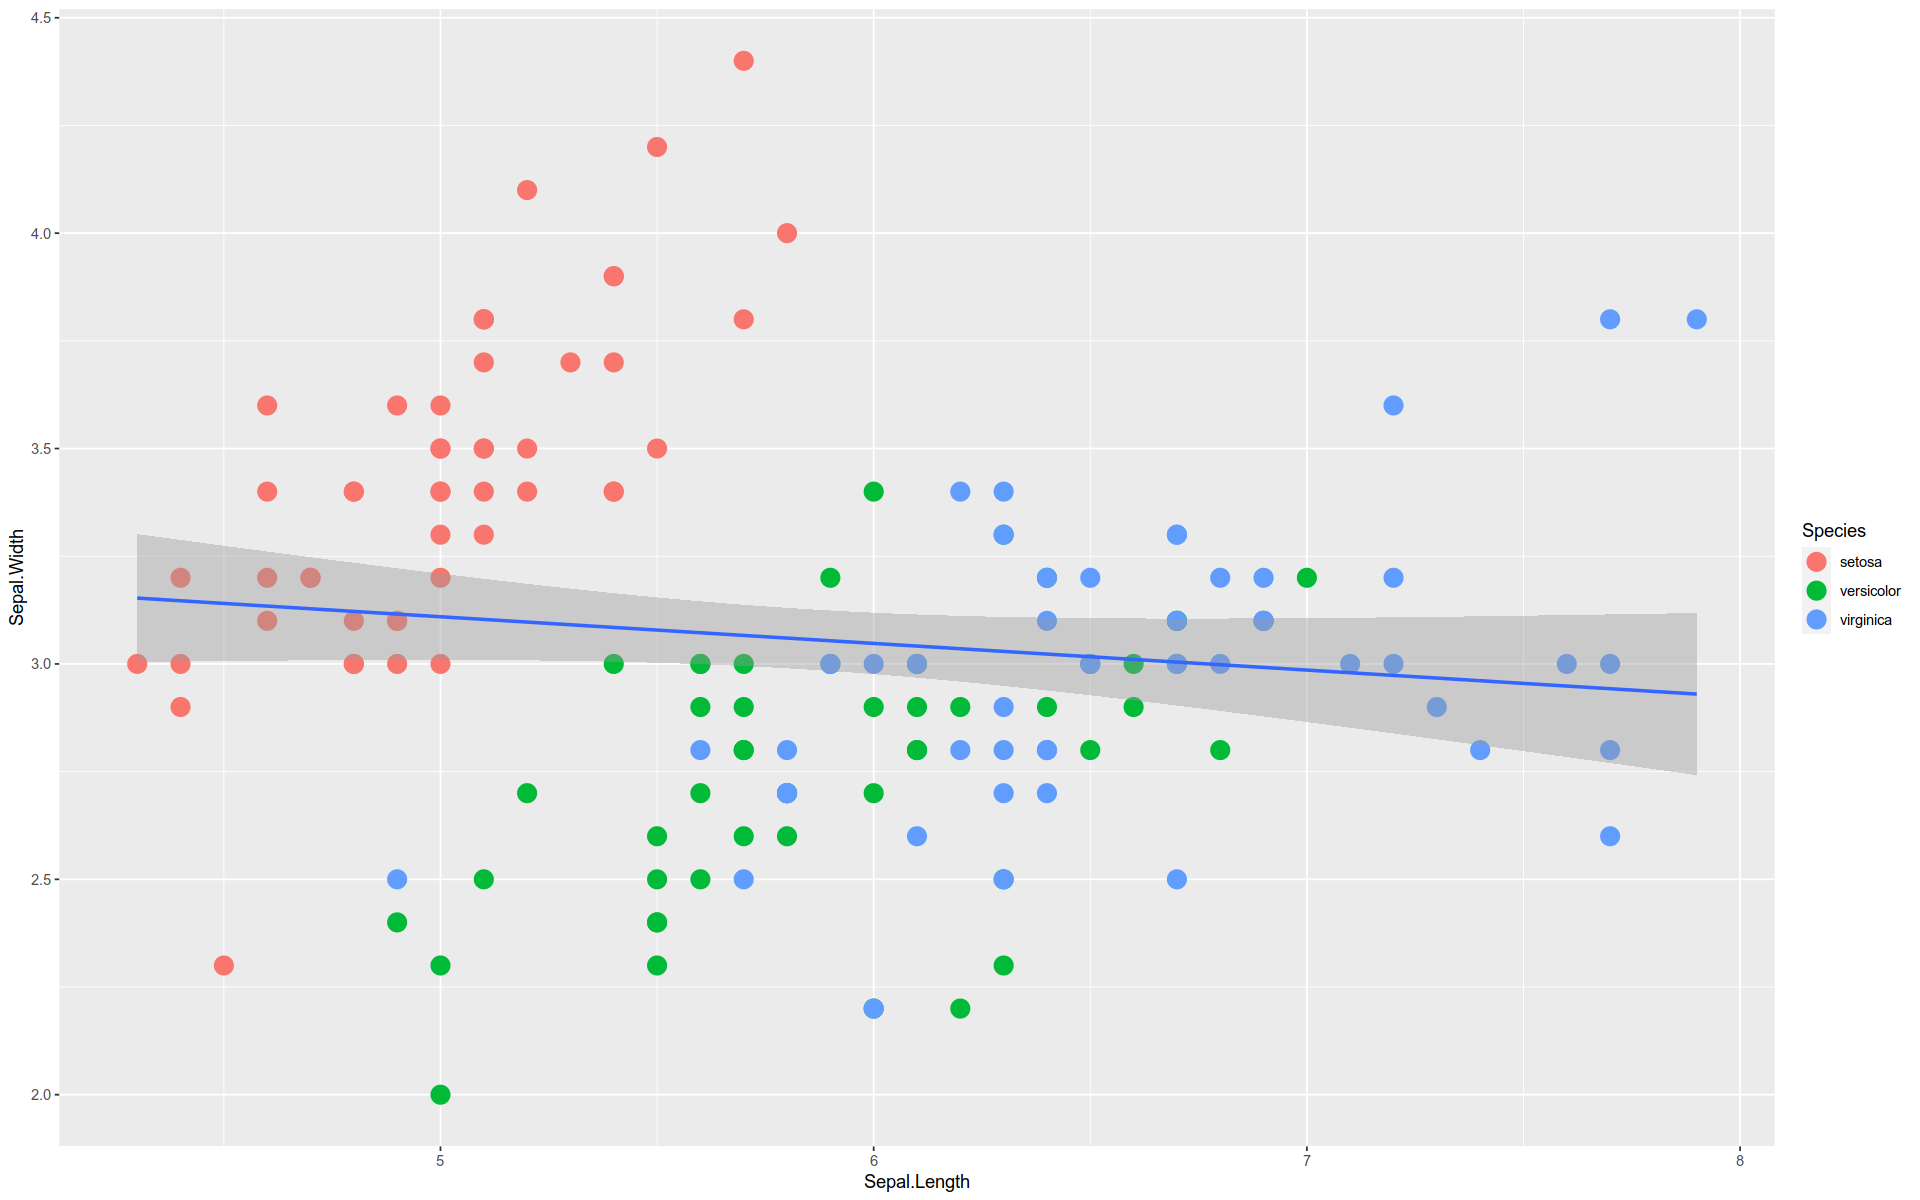

In [5]:
iris %>%
    ggplot(aes(x = Sepal.Length, y = Sepal.Width)) + 
    geom_point(size = 5, aes(color = Species)) + 
    stat_smooth(method = lm)

The tilde sign `~` means "as a function of" &mdash; in this case, `y` is being plotted as function of `x`.

Interestingly, if we pull the  `aes()` function out of `geom_point()`, we get a different plot.

`geom_smooth()` using formula = 'y ~ x'


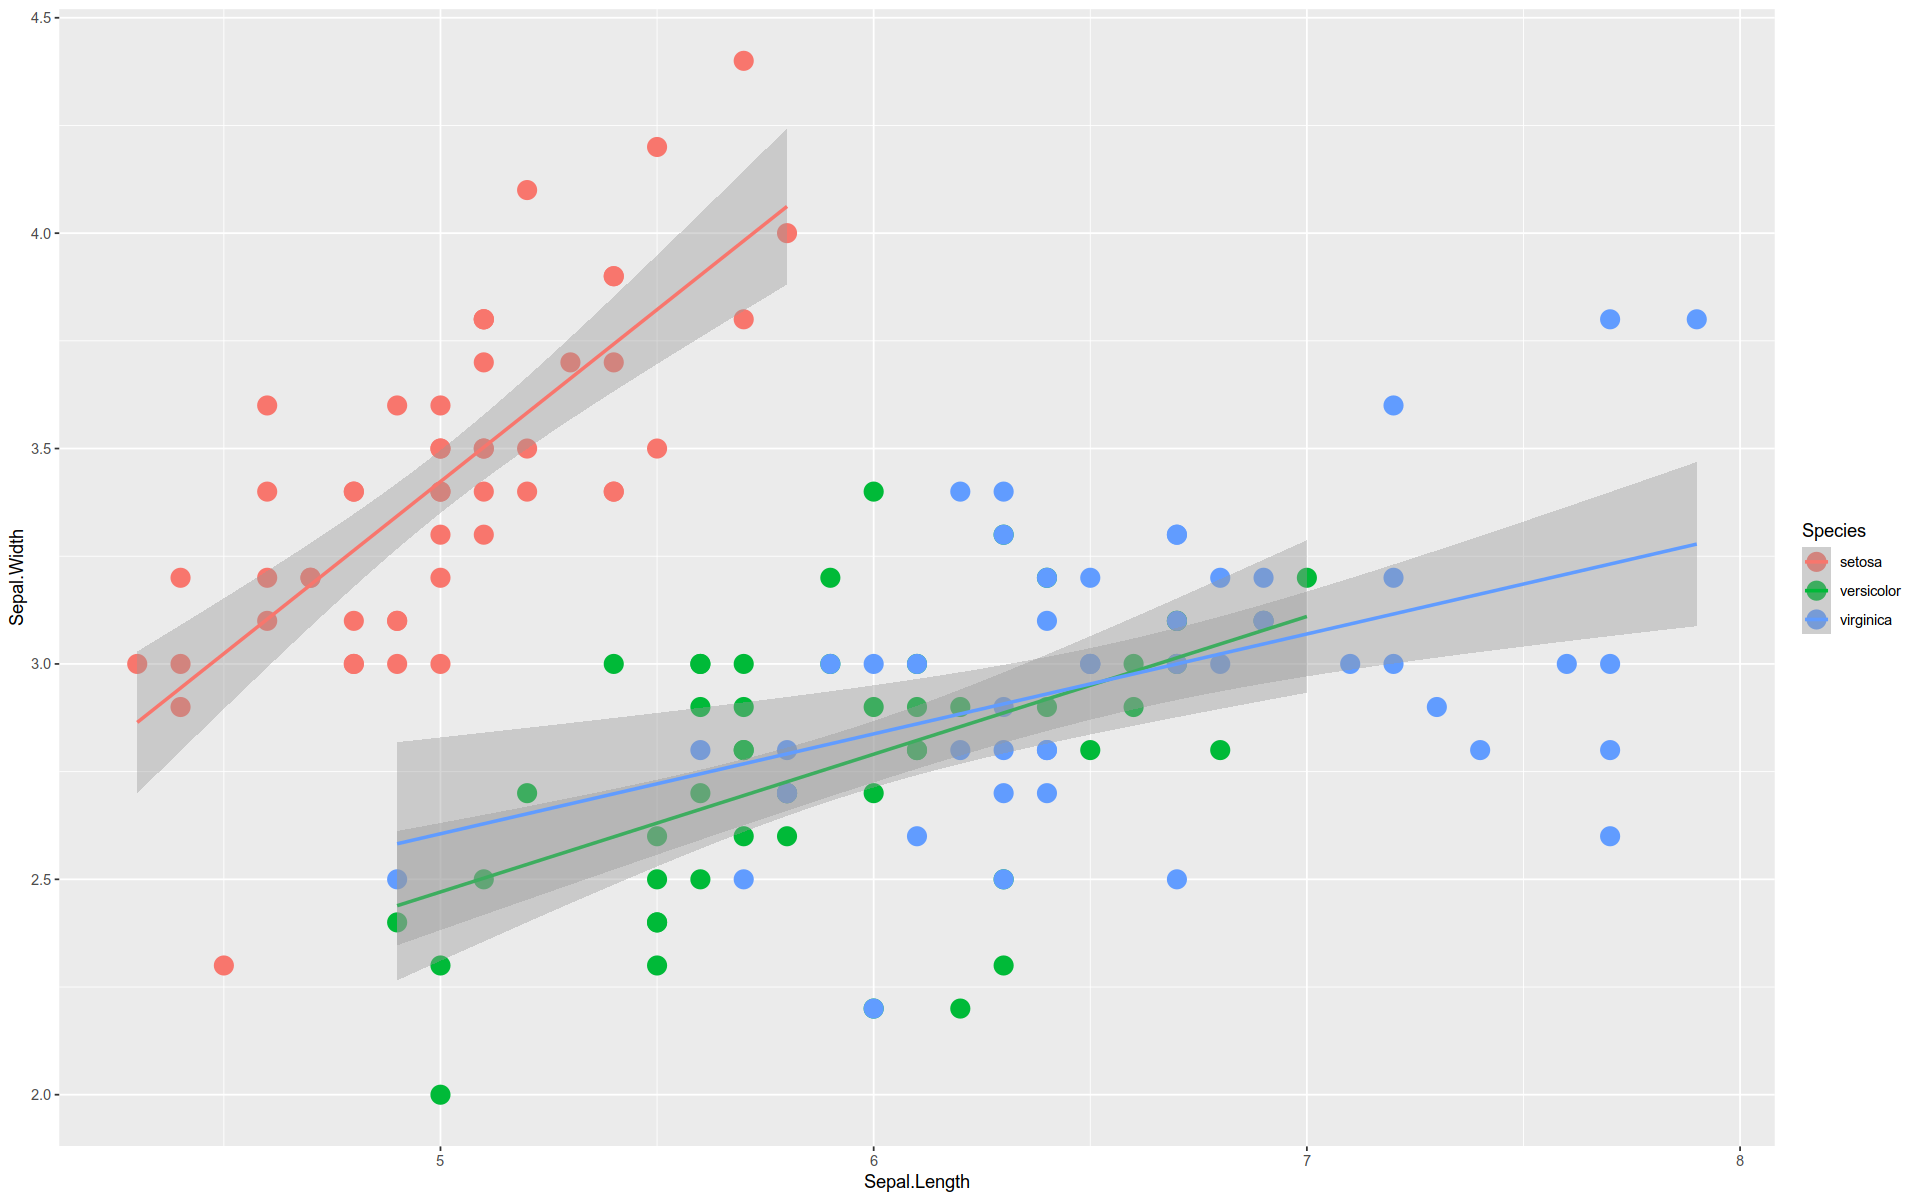

In [6]:
iris %>%
    ggplot() +
    aes(color=Species) +
    geom_point(size = 5) +
    aes(x = Sepal.Length, y = Sepal.Width) +
    stat_smooth(method = lm)

# The `+` Operator

You will notice the use of the `+` operator to connect GGPlot functions together to produce a final product. 

Theses are not quite the same as pipes `%>%`.

Whereas pipes feed data from one function to another, the `+` operation is a form of **method chaining**.

We saw method chaining in Pandas.

Keep in mind: the `+` always goes at the **end of a line**, never at the beginning.

# Faceting

GGPlot also provides plot **faceting**.

Faceting is the visual equivalent of **grouping** in the split-apply-combine pattern. 

Just as with grouping, the **distinct values** in a data feature are used to divide the visualization into groups.

Each group takes the same form but shows a different subset of data.

`geom_smooth()` using formula = 'y ~ x'


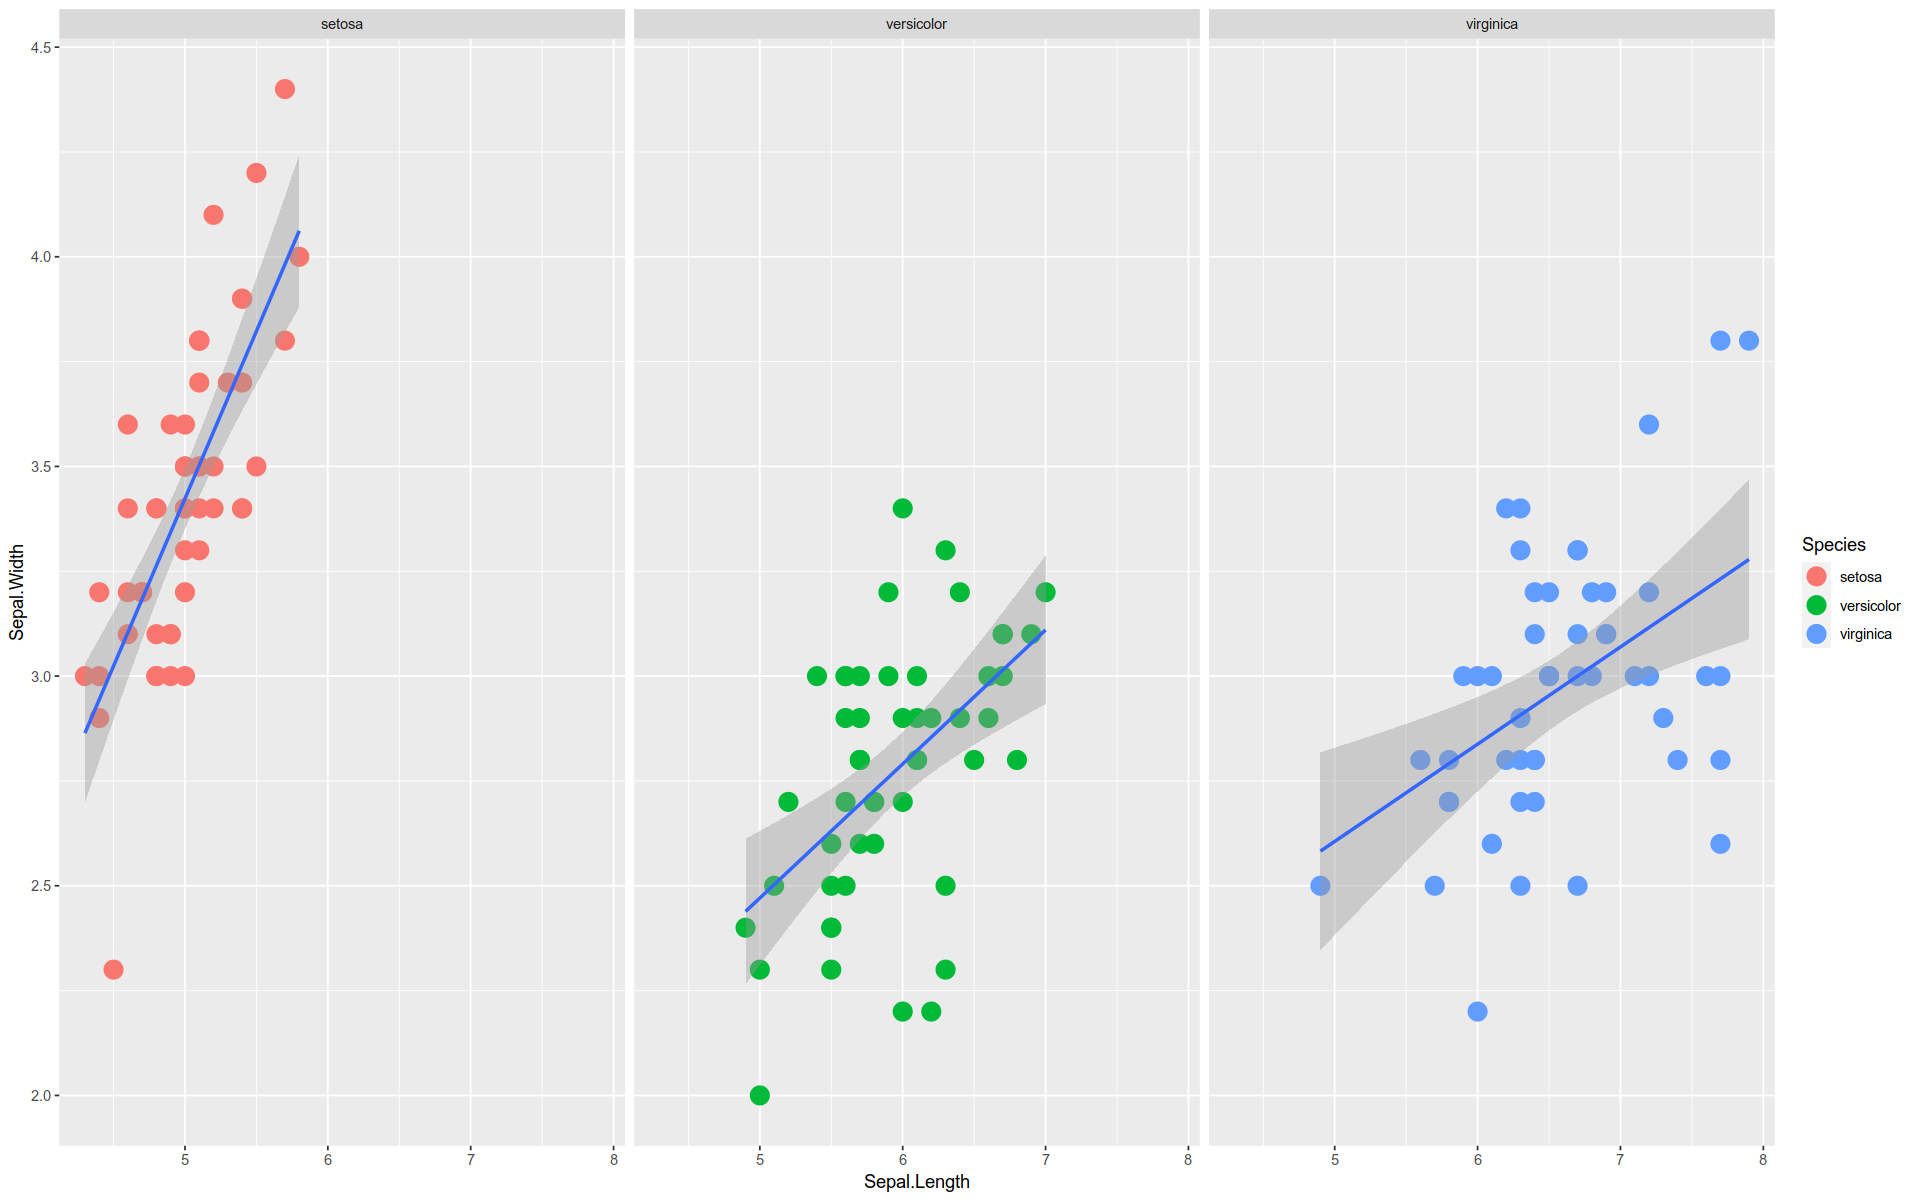

In [8]:
iris %>%
    ggplot(aes(x = Sepal.Length, y = Sepal.Width)) + 
    geom_point(size = 5, aes(color = Species)) + 
    stat_smooth(method = lm) +
    facet_wrap(facets = vars(Species))

By the way, this is an example of Simpson's Paradox. 

The overall trend is downward, but each group trend upward.

We can see this by layering the regression line for the aggregate over the individual ones.

`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


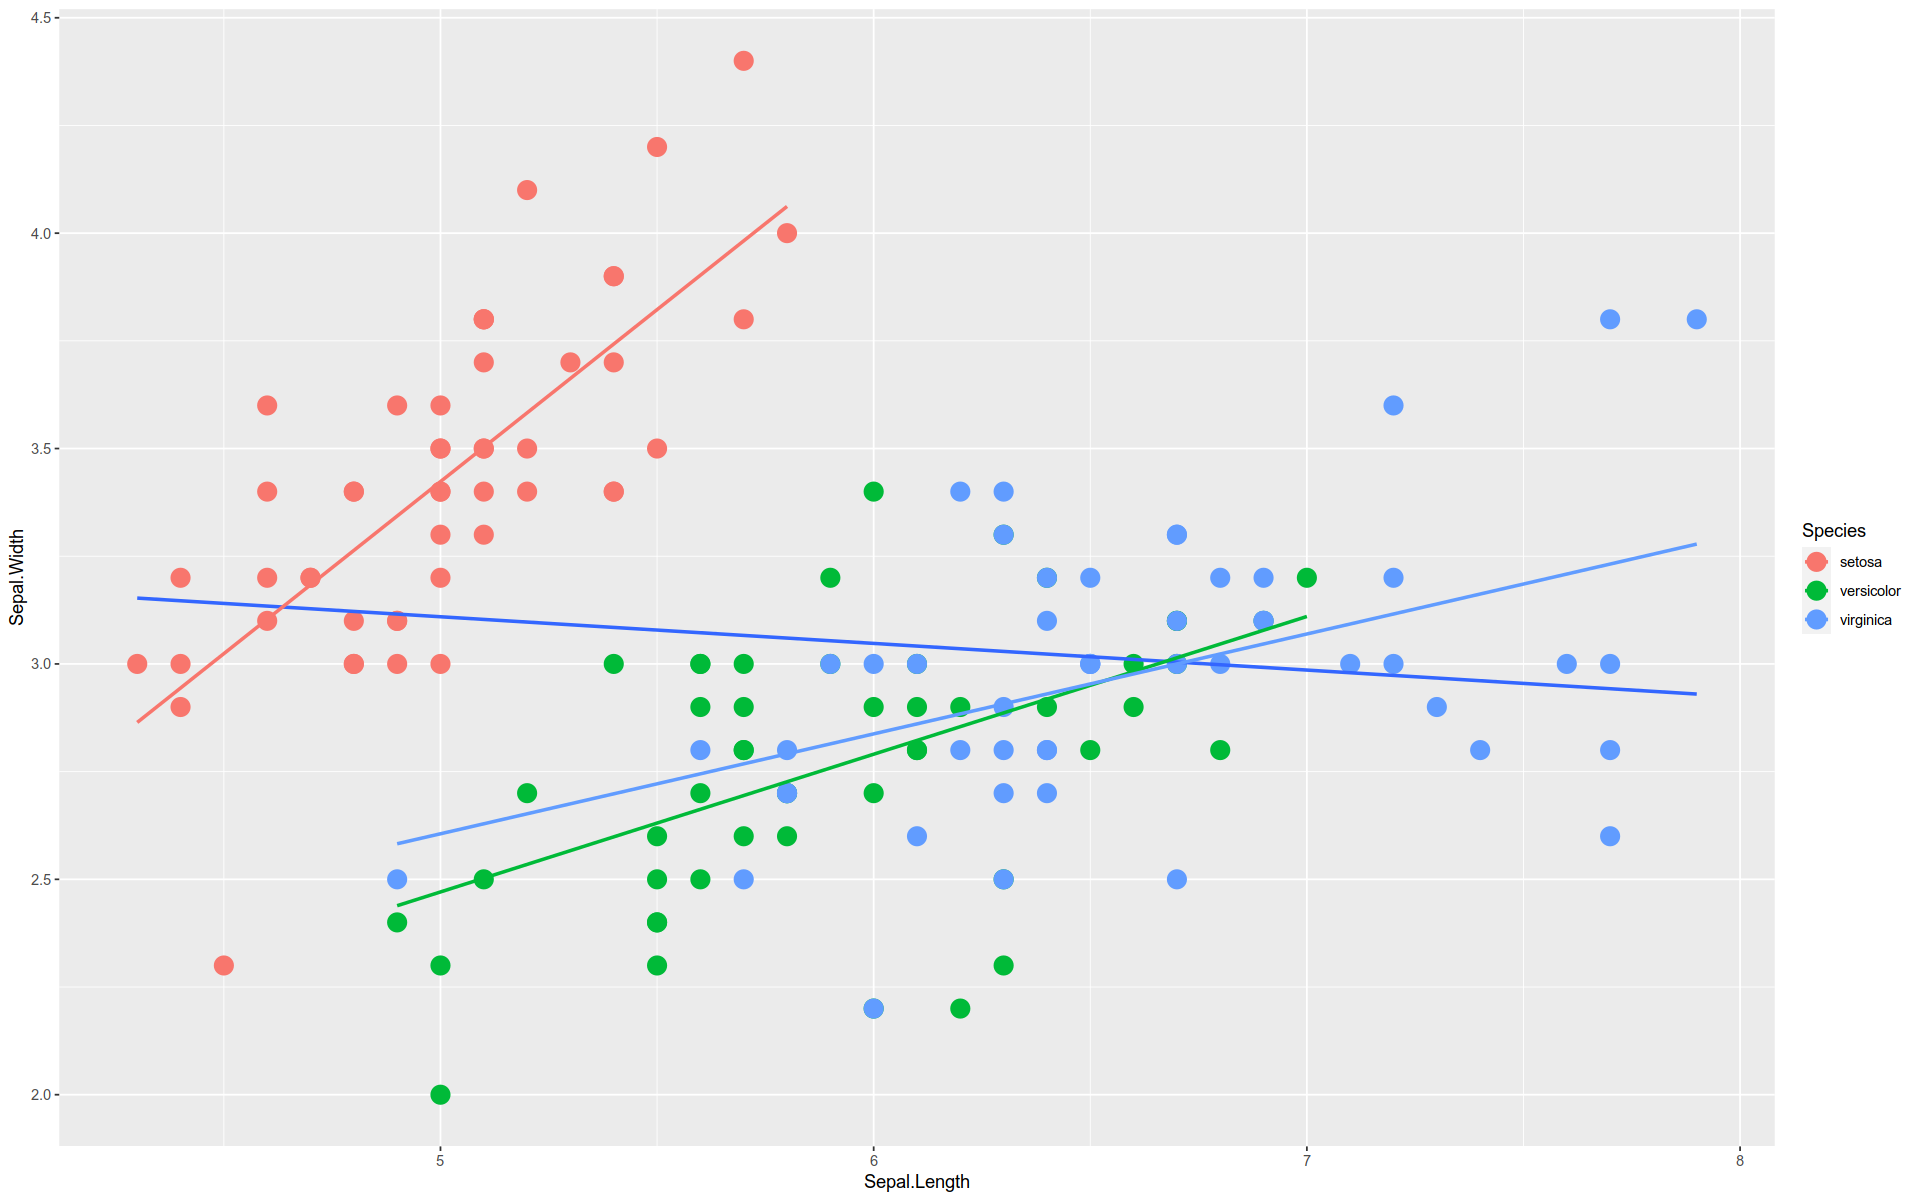

In [9]:
iris %>%
    ggplot(aes(x = Sepal.Length, y = Sepal.Width)) + 
    geom_point(size = 5, aes(color=Species)) + 
    stat_smooth(method = lm, se=F) +
    stat_smooth(method = lm, se=F, aes(color=Species))

Note, the `se` argument in `stat_smooth()` toggles whether or not to display the shaded confidence intervals.

# Visualizing Dimensions

Aesthetics and facets are ways to represent extra dimensions without resorting to increasing the number of axes in our plots.

For example, instead of using color or facets to represent species, we might have considered a third axis `z` to represent this feature. 

We tend to avoid going beyond two axes in our plots and so resort to other visual devices.

# Bar Chart

Let's look at some other geometries.

Here is a simple bar chart made with `gemo_bar()`.

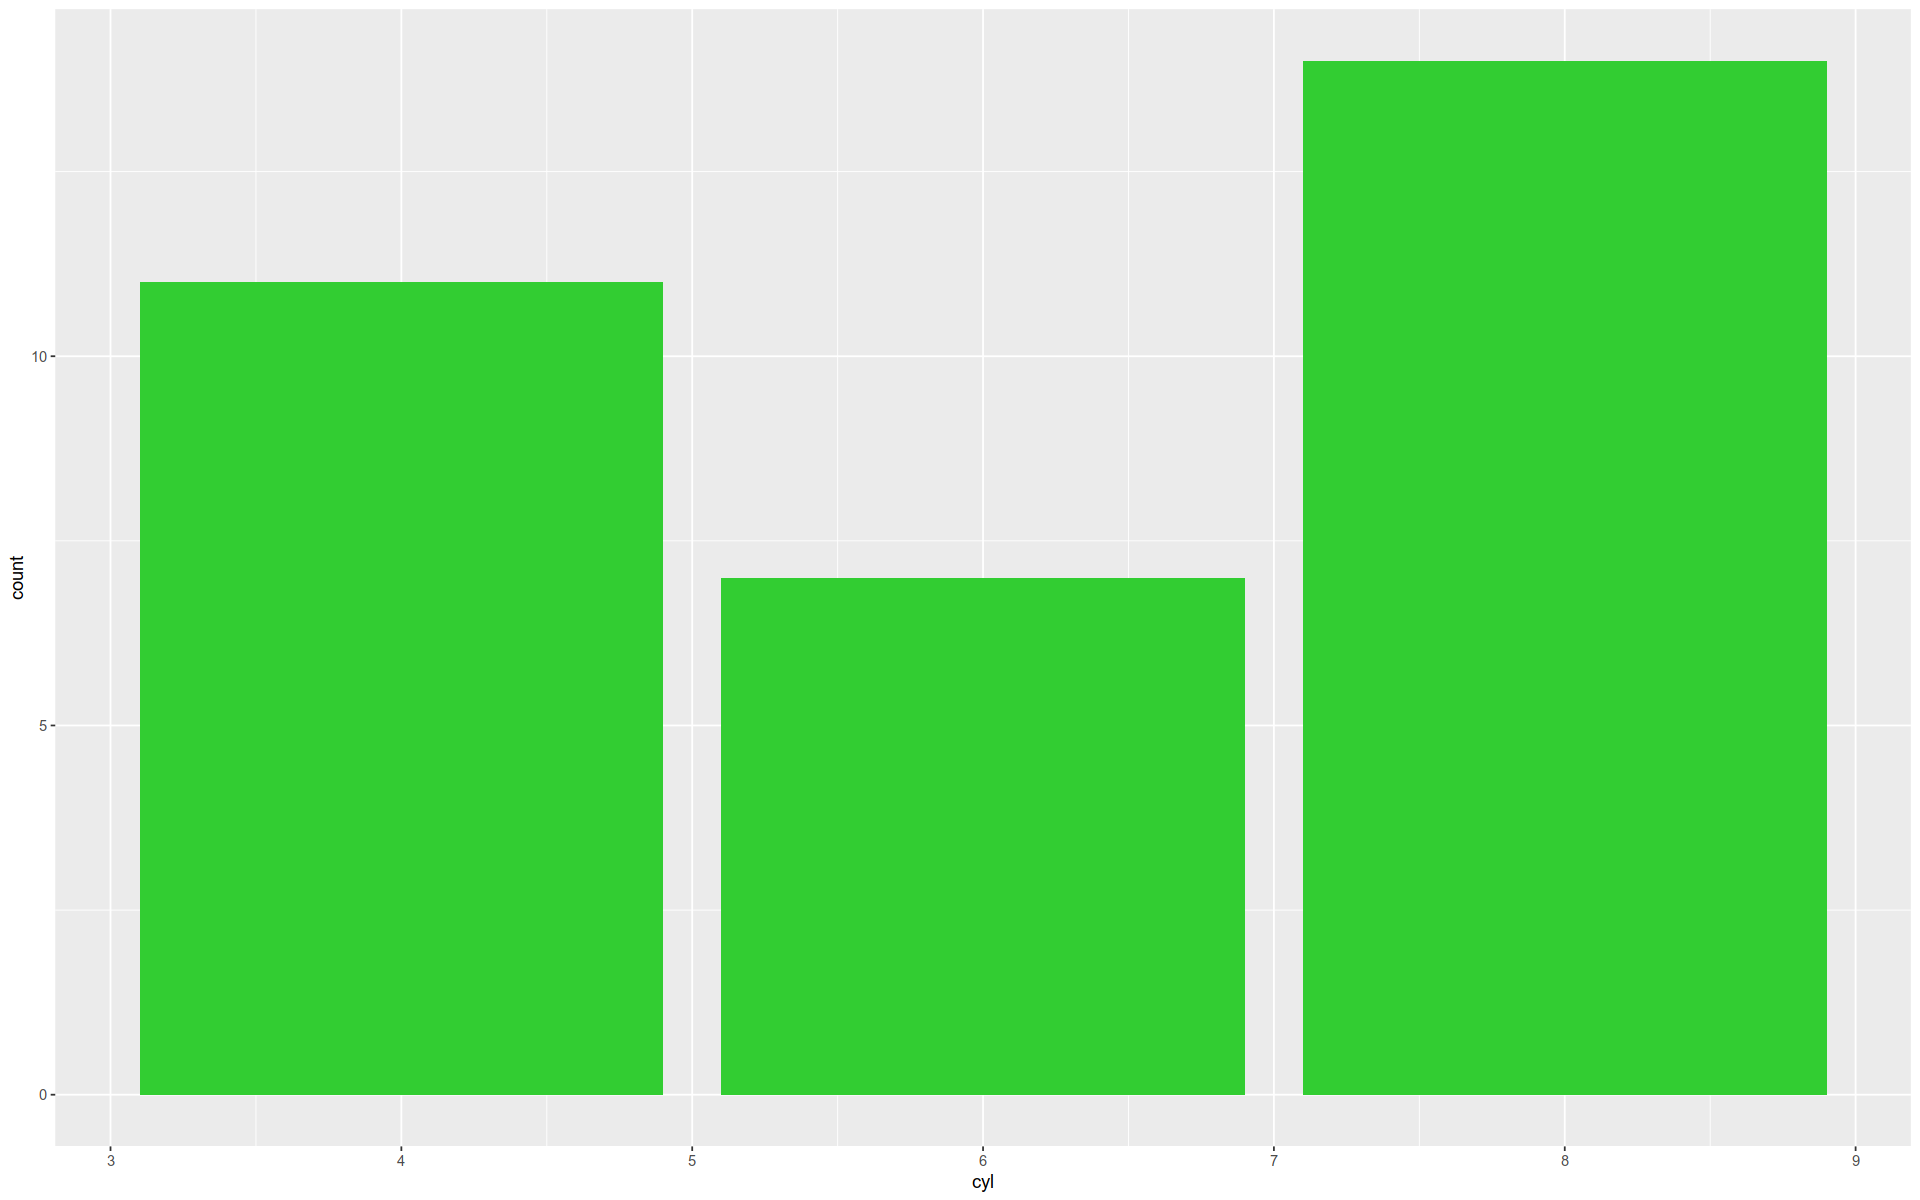

In [10]:
mtcars %>% 
    ggplot(aes(x = cyl)) +
    geom_bar(fill = 'limegreen')

# Histogram

The function `geom_hist()` will generate a histogram.

Note that this function actually performs a behind-the-scenes data transformation, which goes beyond mapping the data.

We typically see this with the `stat_` family of functions.

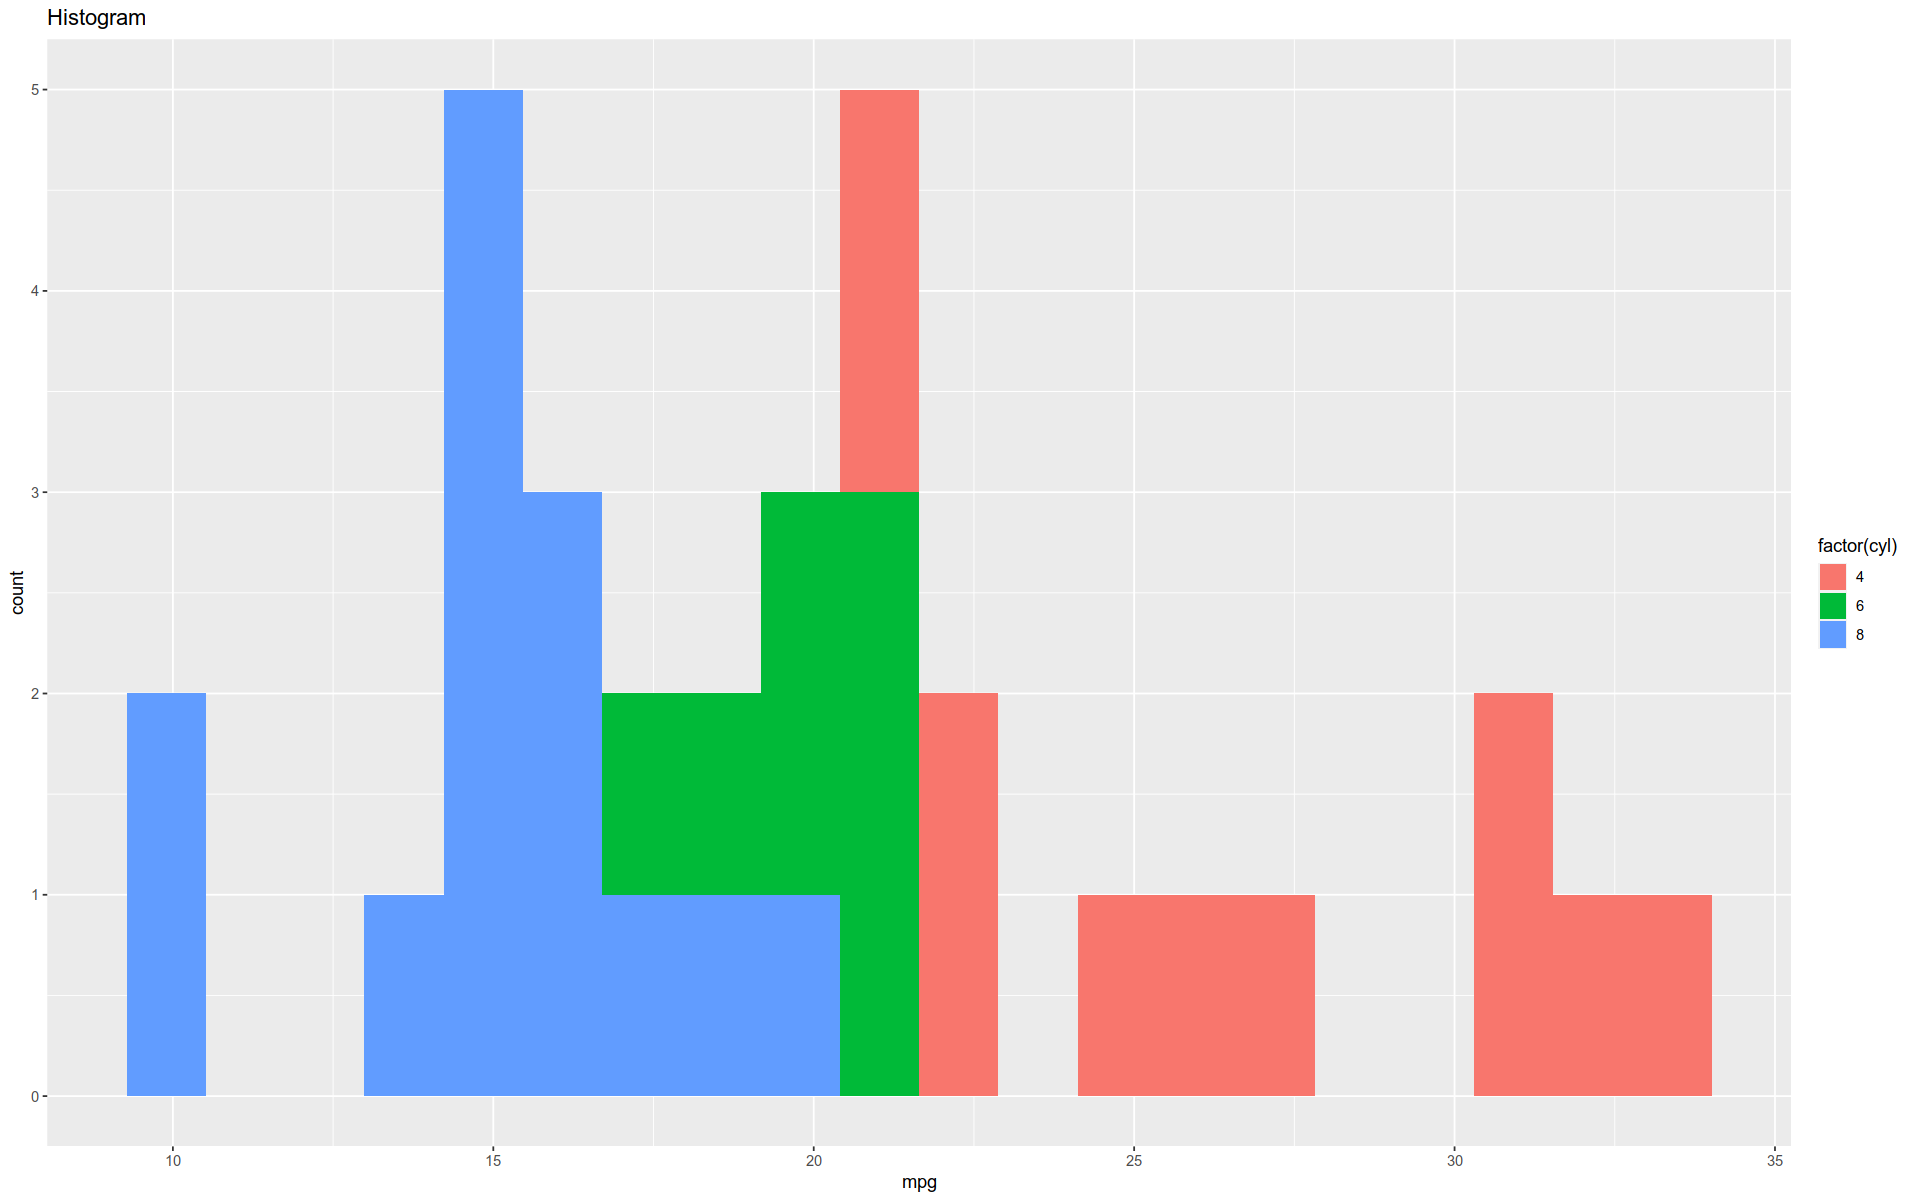

In [11]:
mtcars %>% 
    ggplot(aes(x = mpg)) + 
    geom_histogram(bins = 20, aes(fill = factor(cyl))) + 
    labs(title="Histogram") 

Note the use of the `lab()` function to provide a title.

# Density Plot

Here is a **kernel density estimate** (KDE) plot made with `geom_density()`.

A KDE plot is a smoothed version of a histogram. 

As with `geom_histogram()`, this function does some behind-the-scenes compuation and then plots the result.

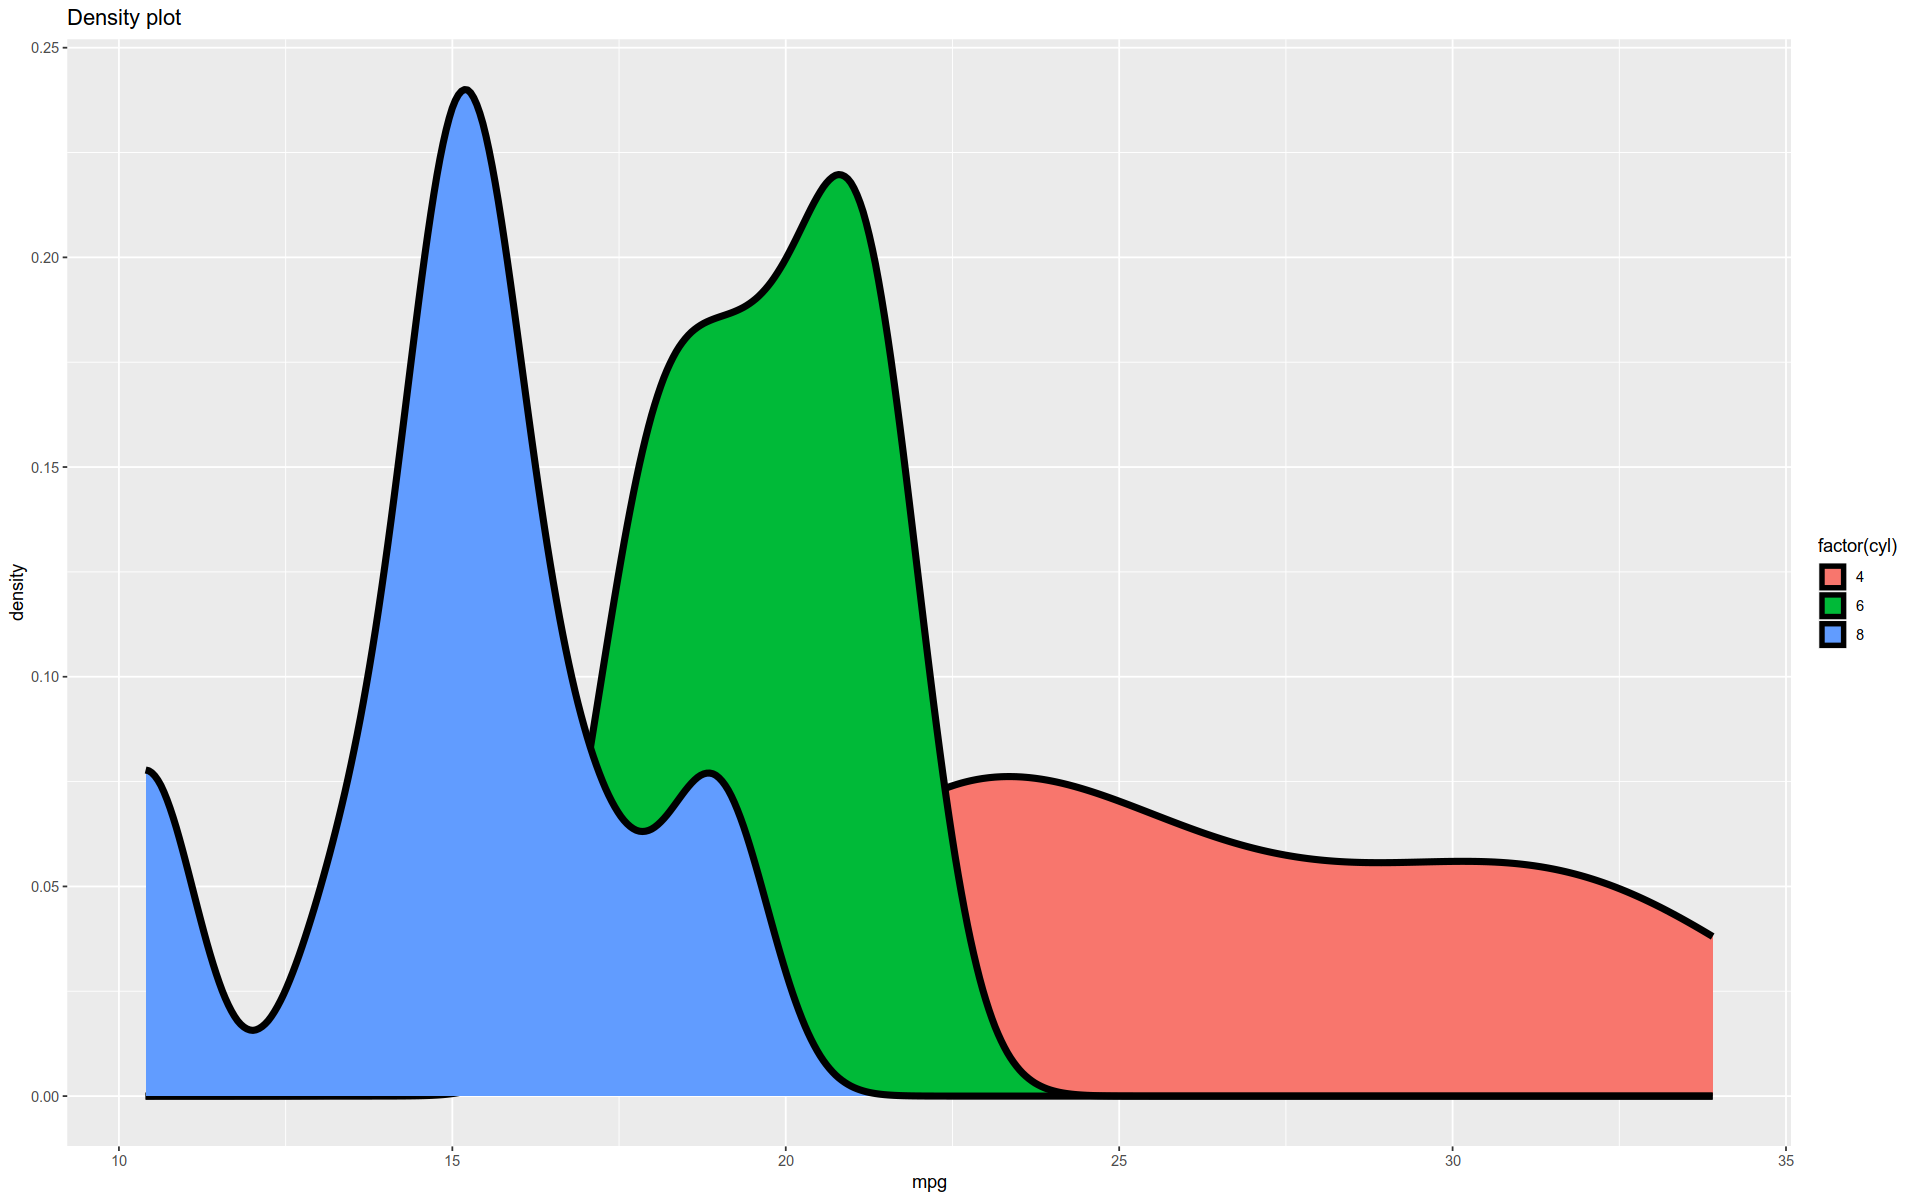

In [12]:
mtcars %>% 
    ggplot(aes(x = mpg)) + 
    geom_density(size = 2, aes(fill = factor(cyl))) + 
    labs(title="Density plot") 

# Boxplot

The function `geom_boxplot()` gives a classic boxplot, showing the mean, quantiles, and outliers of each variable. 

Note the arguments used &mdash; they control how the outliers are rendered.

Notice we also pull out the `aes()` function for clarity; it could have remained within the geometry function's argument space.

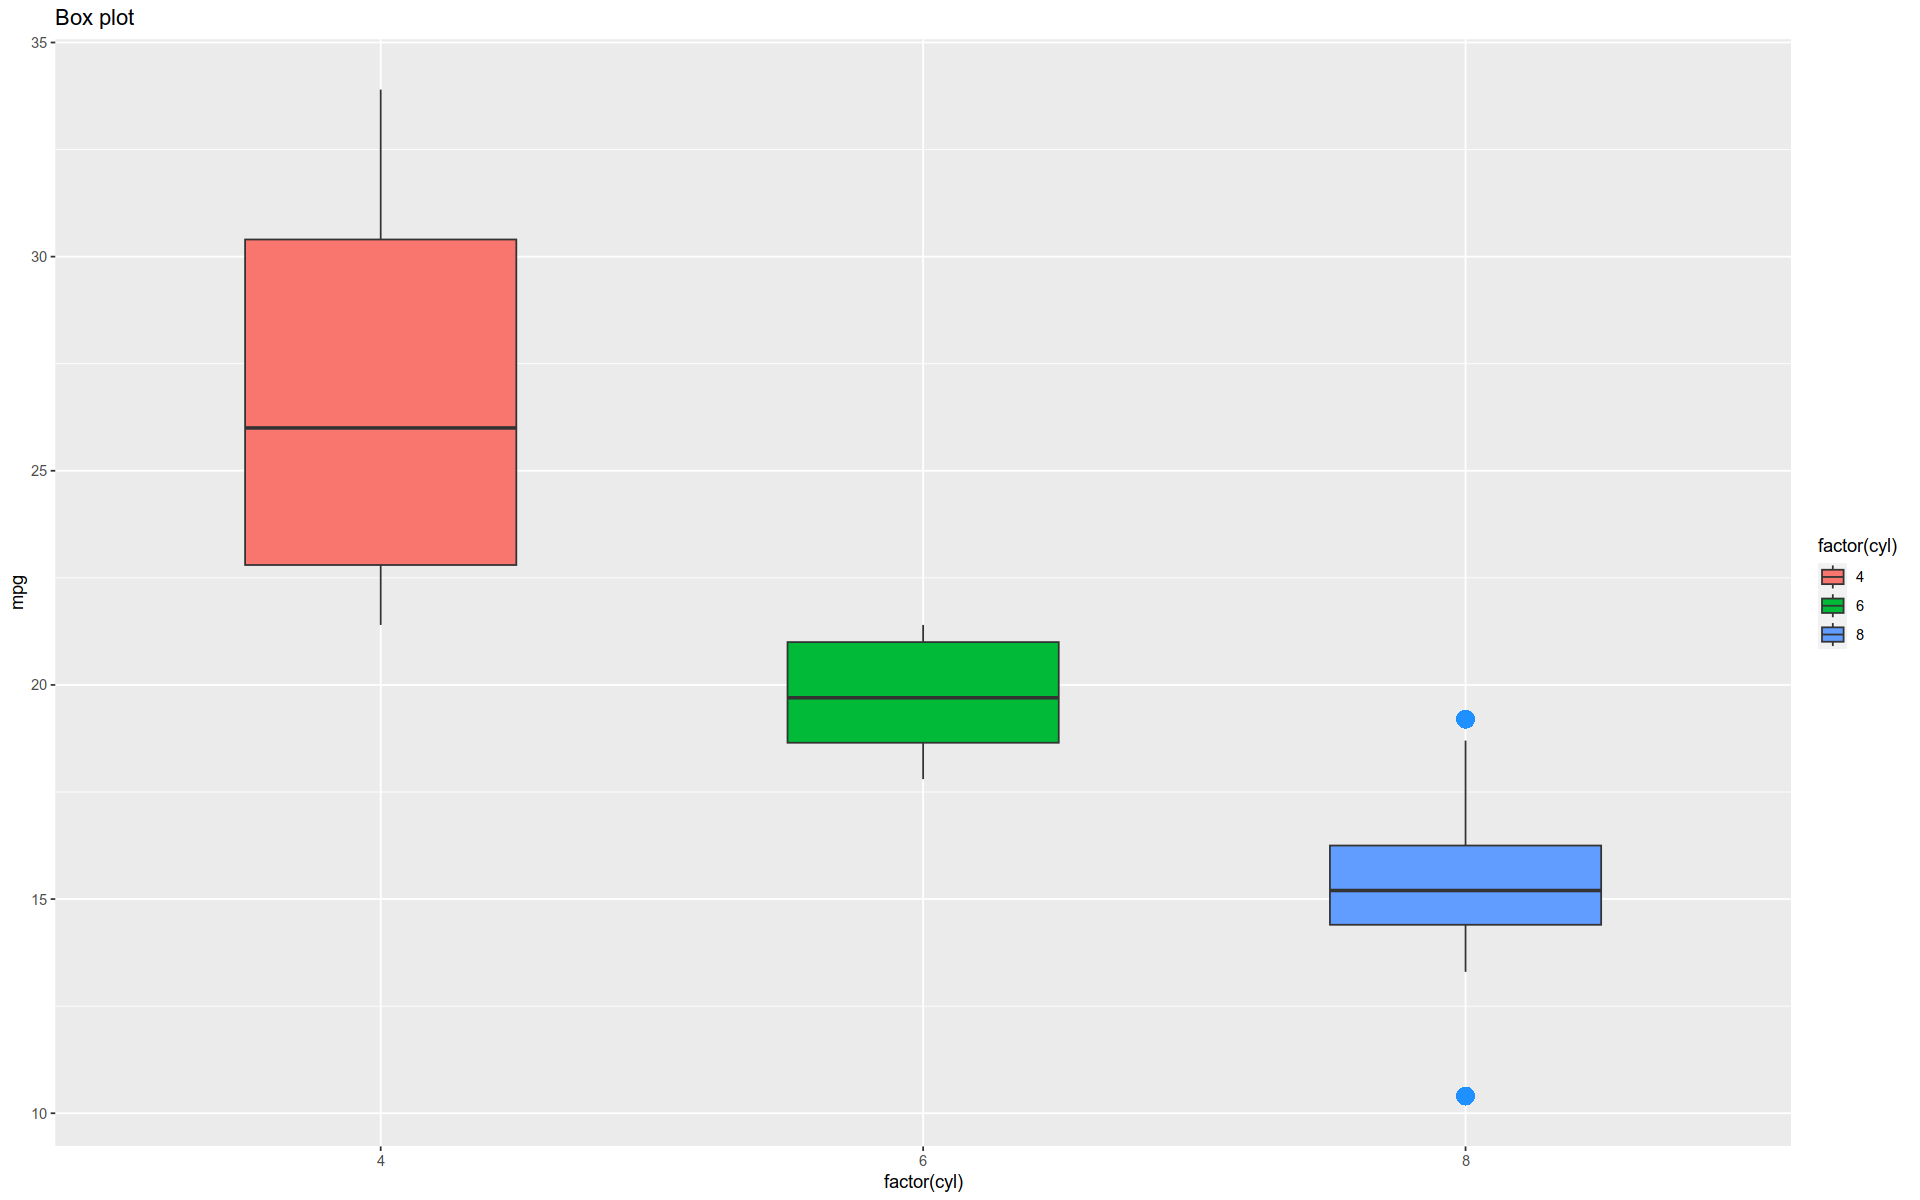

In [13]:
mtcars %>% 
    ggplot(aes(x = factor(cyl), y = mpg)) +
    geom_boxplot(
        width = 0.5, 
        outlier.colour = "dodgerblue", 
        outlier.size = 4, 
        outlier.shape = 16, 
        outlier.stroke = 2, 
    ) + 
    aes(fill = factor(cyl)) +
    labs(title = "Box plot")

# Violin Plot

This is a violin plot using `geom_violin()`.

A violin plot is something like a smoothed version of a boxplot.

This version is untrimmed, i.e. we set `trim` to `FALSE`.

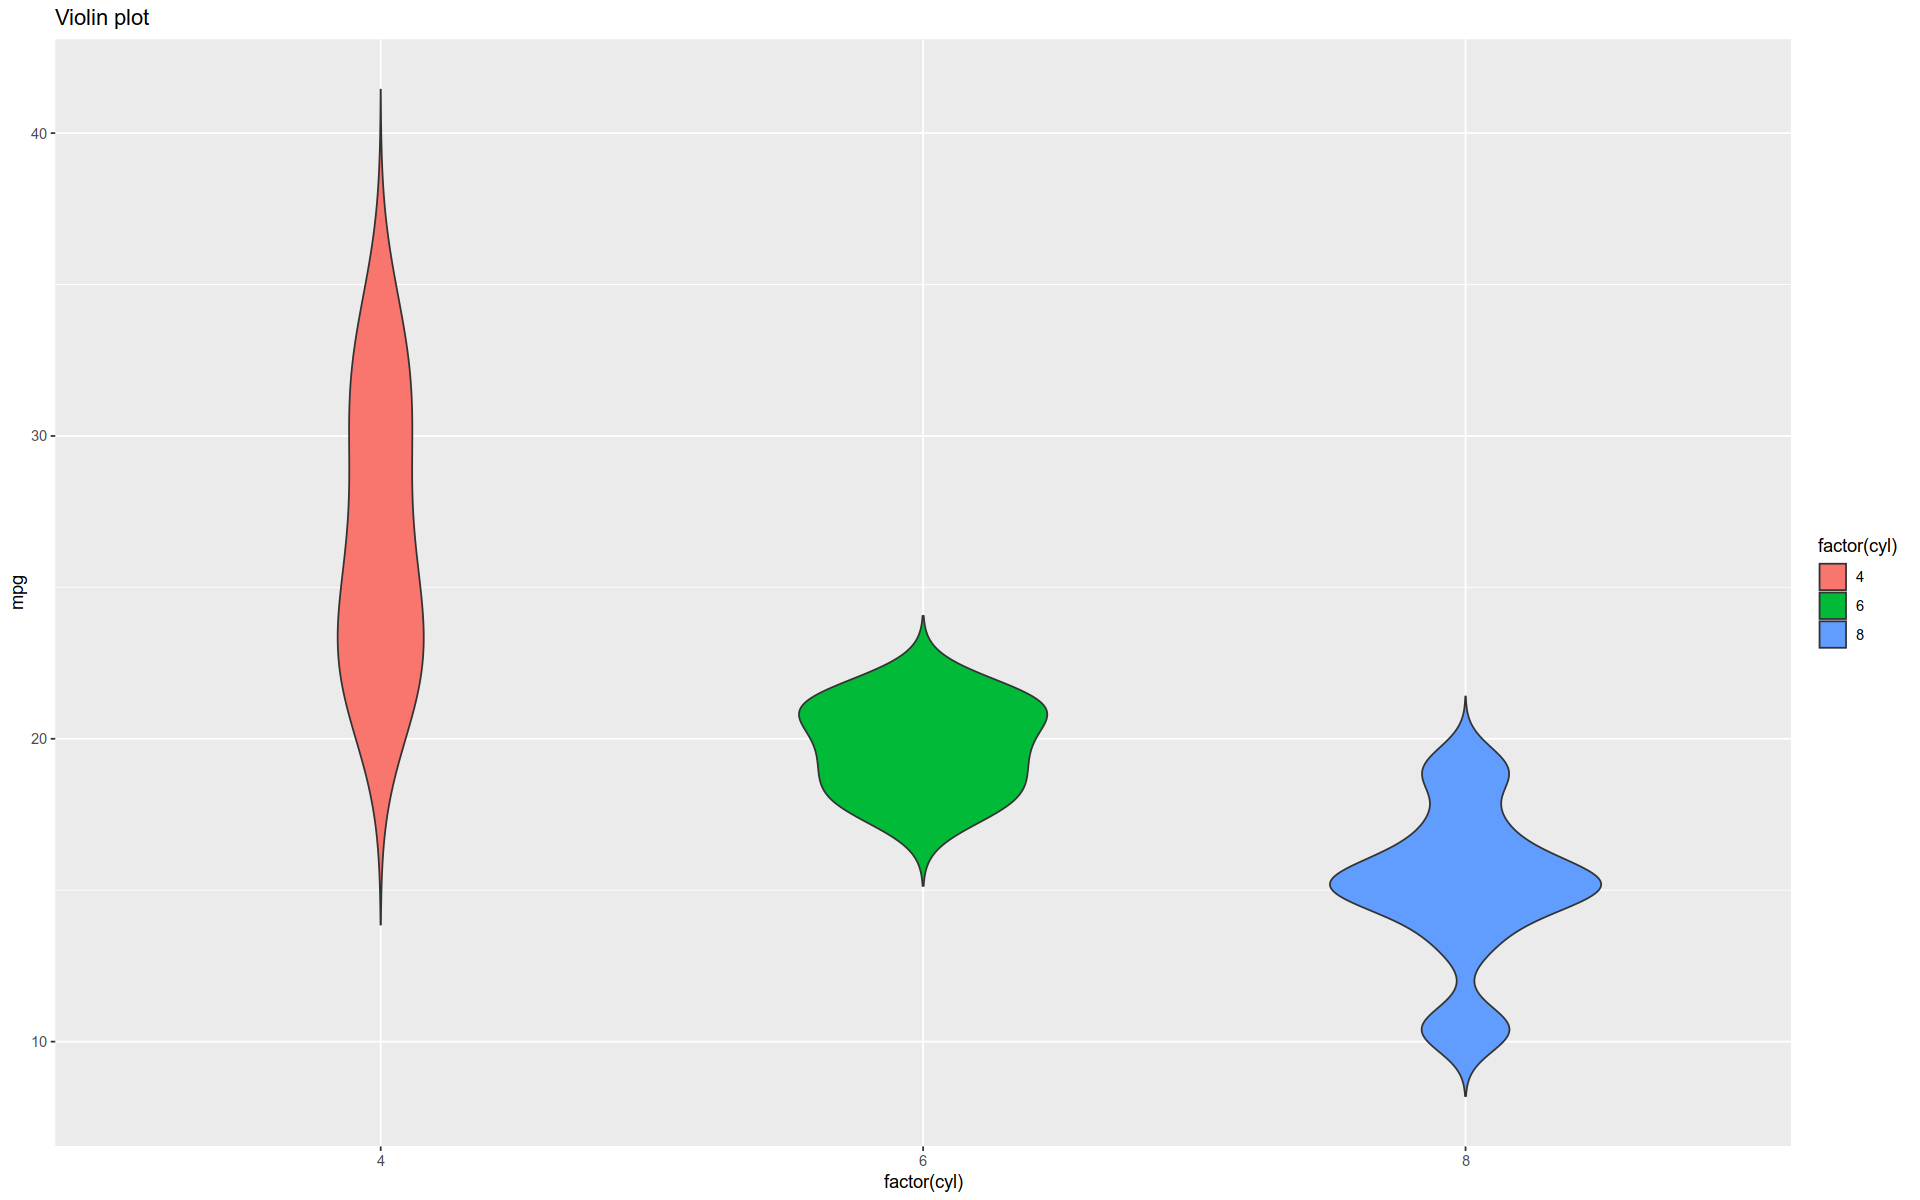

In [14]:
mtcars %>%
    ggplot(aes(factor(cyl), mpg)) + 
    geom_violin(width = 0.5, trim = F) + 
    aes(fill = factor(cyl)) +
    labs(title = "Violin plot")

# Heatmap

To create a heatmap, we use `geom_tile()`.

To use this function, we first need to **reshape** our data into **narrow** form.

Here, we take a **correlation** matrix among the features of `mtcars`. 

In [15]:
corr <- round(cor(mtcars), 2)
corr

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
mpg,1.00,-0.85,-0.85,-0.78,0.68,-0.87,0.42,0.66,0.60,0.48,-0.55
cyl,-0.85,1.00,0.90,0.83,-0.70,0.78,-0.59,-0.81,-0.52,-0.49,0.53
disp,-0.85,0.90,1.00,0.79,-0.71,0.89,-0.43,-0.71,-0.59,-0.56,0.39
hp,-0.78,0.83,0.79,1.00,-0.45,0.66,-0.71,-0.72,-0.24,-0.13,0.75
drat,0.68,-0.70,-0.71,-0.45,1.00,-0.71,0.09,0.44,0.71,0.70,-0.09
wt,-0.87,0.78,0.89,0.66,-0.71,1.00,-0.17,-0.55,-0.69,-0.58,0.43
qsec,0.42,-0.59,-0.43,-0.71,0.09,-0.17,1.00,0.74,-0.23,-0.21,-0.66
vs,0.66,-0.81,-0.71,-0.72,0.44,-0.55,0.74,1.00,0.17,0.21,-0.57
am,0.60,-0.52,-0.59,-0.24,0.71,-0.69,-0.23,0.17,1.00,0.79,0.06
gear,0.48,-0.49,-0.56,-0.13,0.70,-0.58,-0.21,0.21,0.79,1.00,0.27


The we **melt** it into narrow form:

In [16]:
narrow <- reshape2::melt(corr)

In [17]:
narrow %>% head()

,Var1,Var2,value
,<fct>,<fct>,<dbl>
1,mpg,mpg,1.00
2,cyl,mpg,-0.85
3,disp,mpg,-0.85
4,hp,mpg,-0.78
5,drat,mpg,0.68
6,wt,mpg,-0.87


Now we can pass the narrow data frame to our plot constructor:

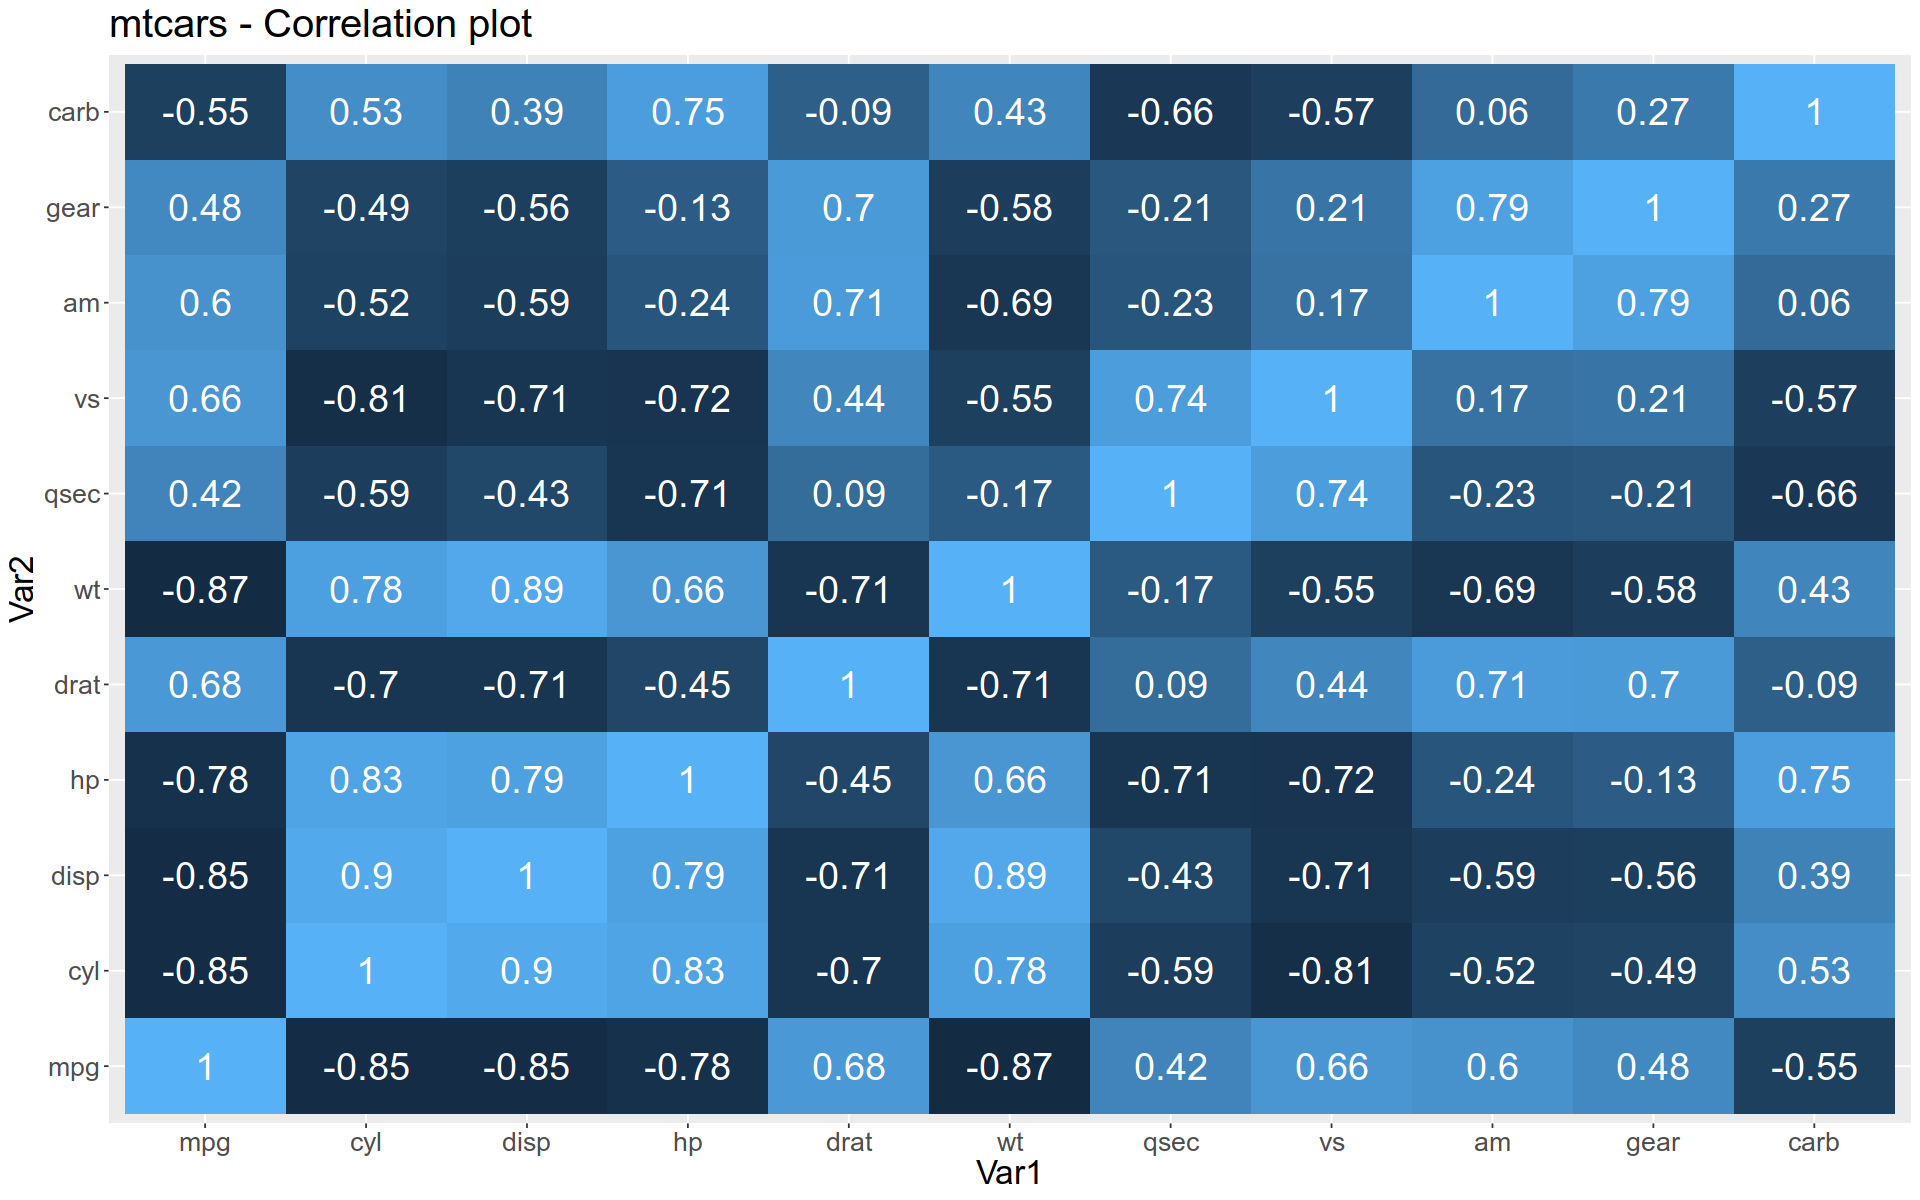

In [18]:
narrow %>% ggplot() +
    aes(x = Var1, y = Var2, fill = value, label = value) +
    geom_tile() + 
    geom_text(color = "white", size = 8) + 
    labs(title="mtcars - Correlation plot") + 
    theme(text=element_text(size = 20), legend.position = "none")

Note the use of `theme()` function to remove the legend and alter the font size in the result.

# Assigning to a Variable

We can assign plots to variables and build them incrementally.

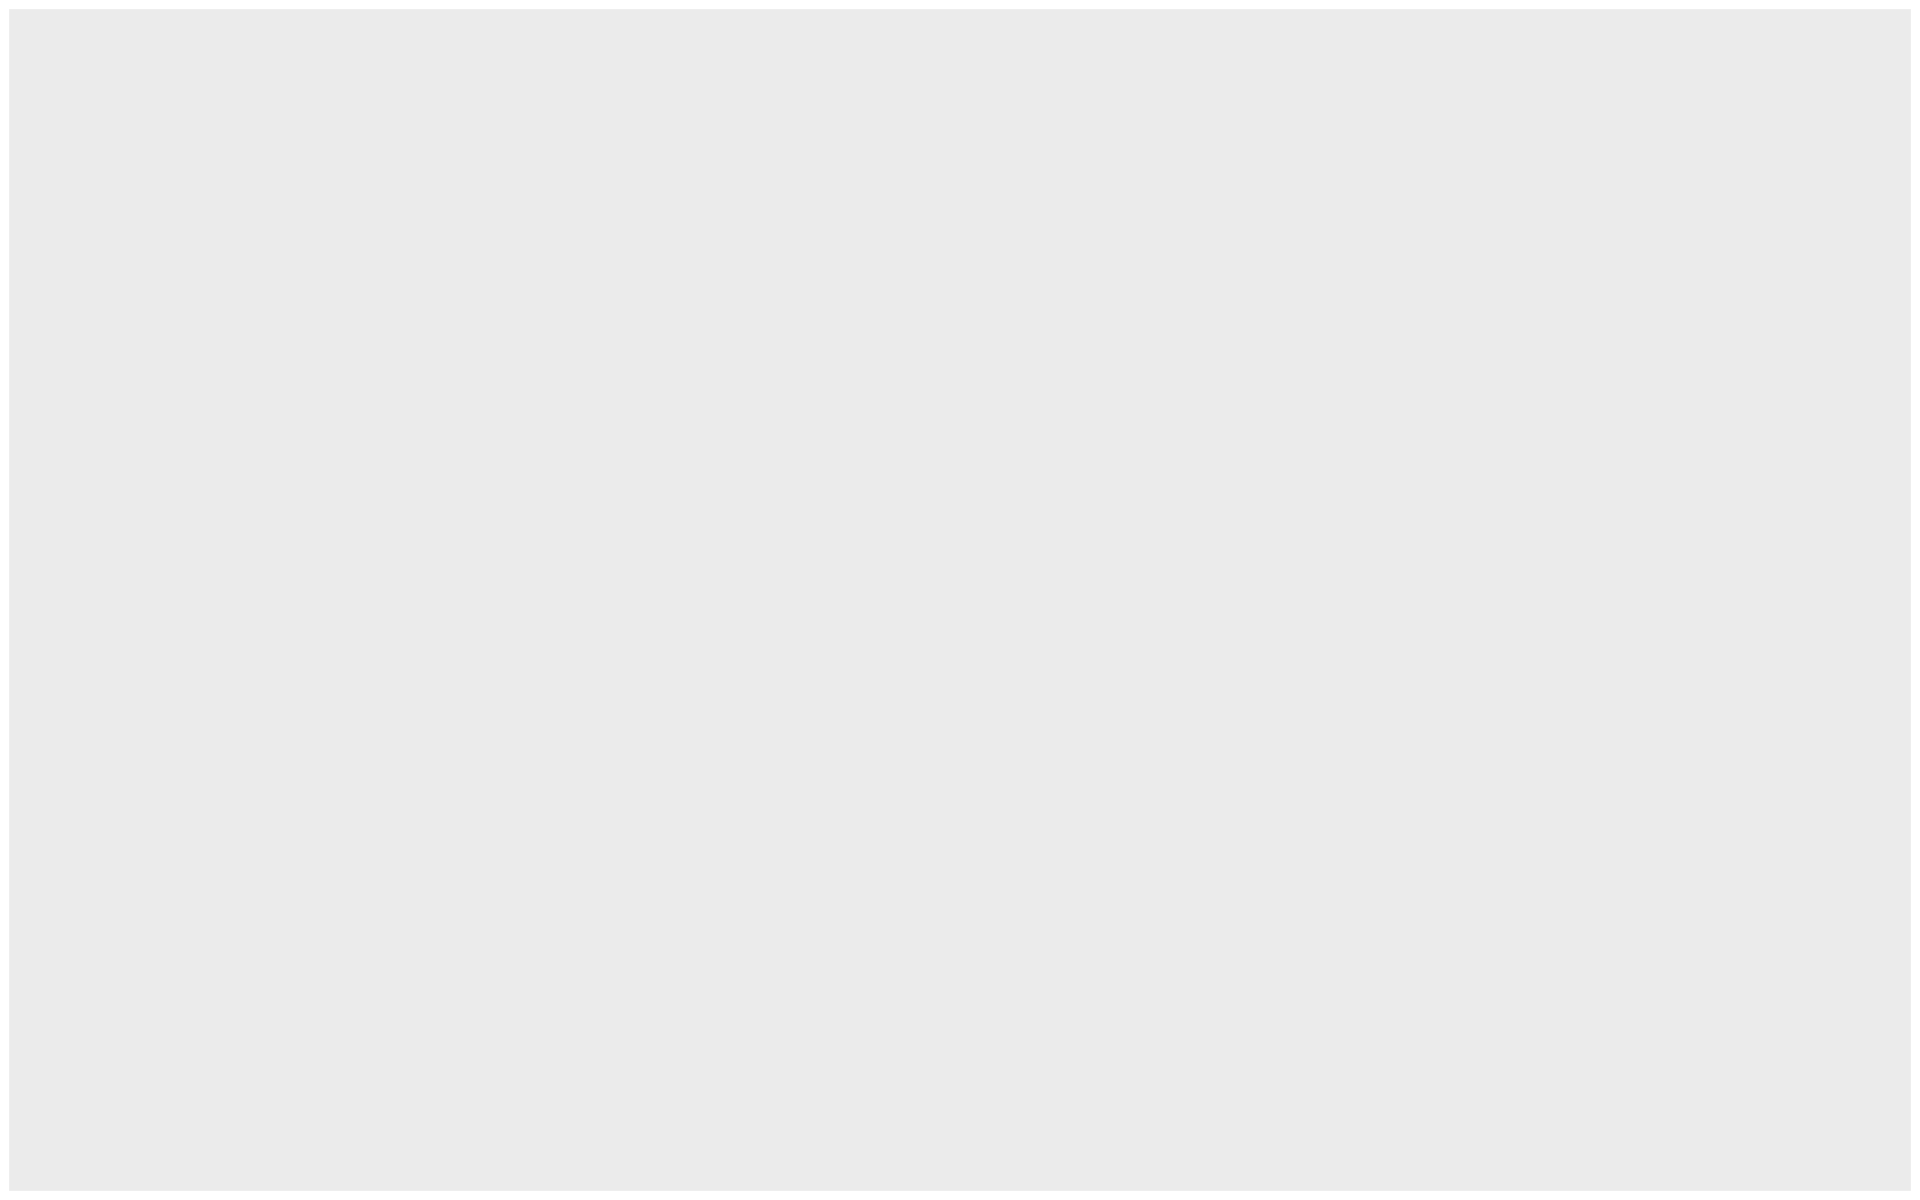

In [19]:
gg <- iris %>% ggplot()
gg

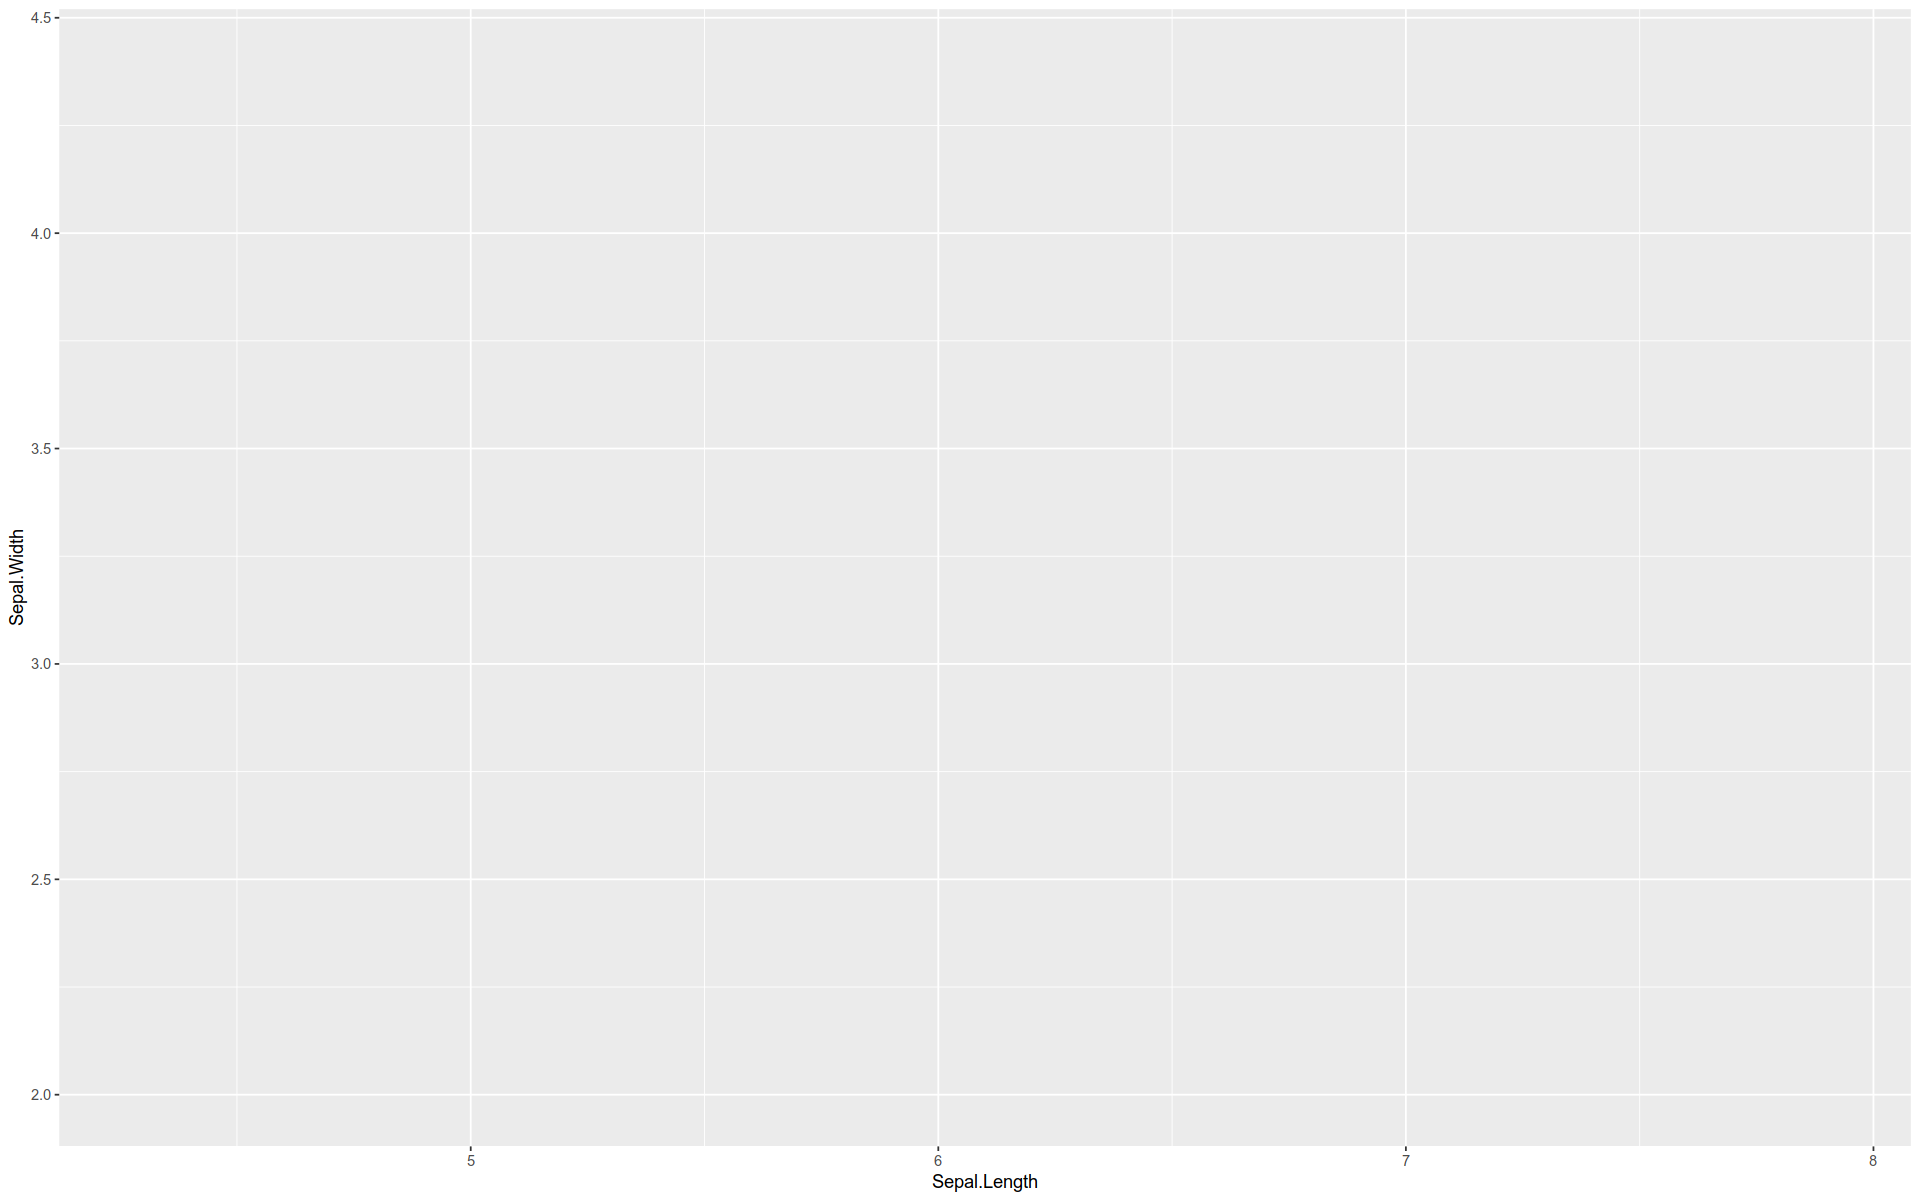

In [20]:
gg <- gg + aes(x = Sepal.Length, y = Sepal.Width)
gg

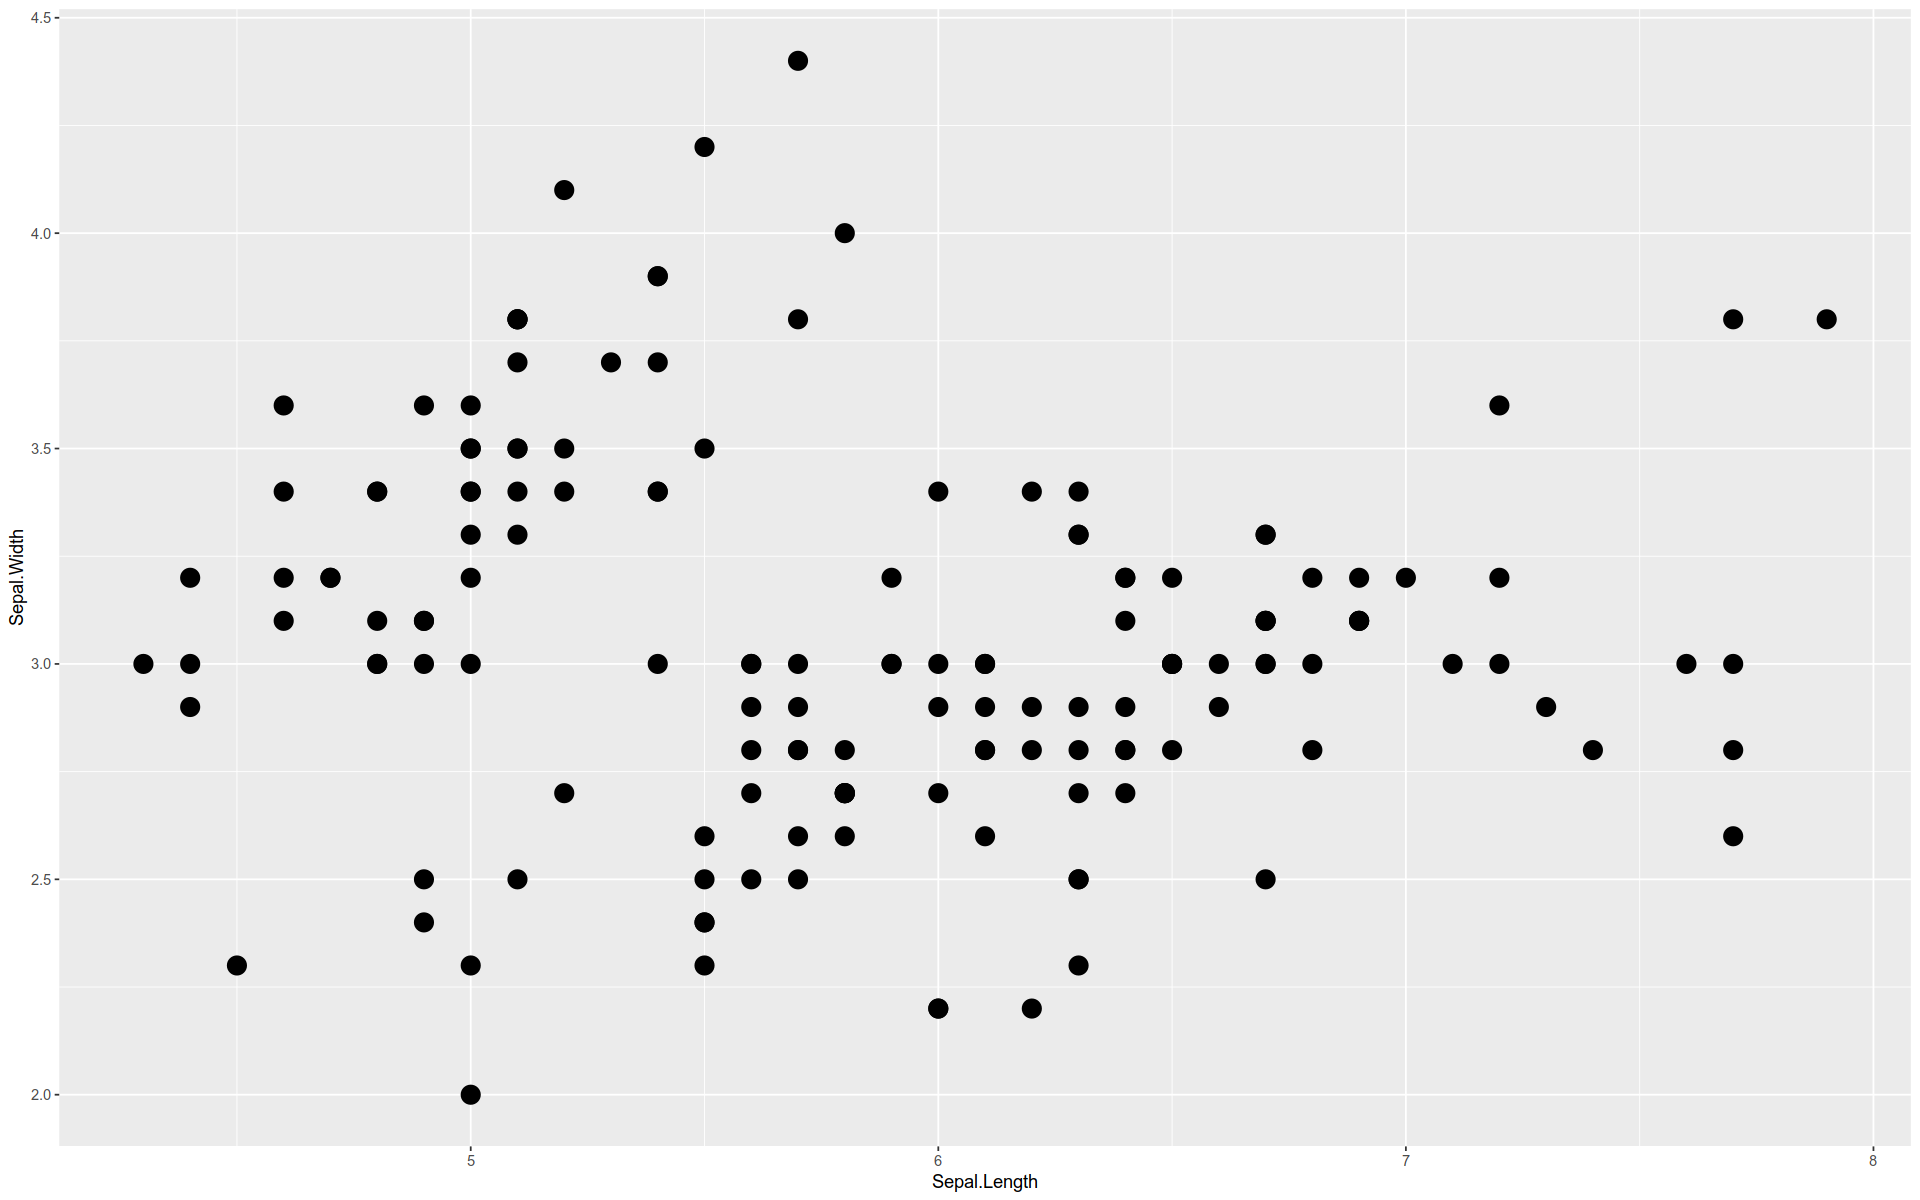

In [21]:
gg <- gg + geom_point(size=5)
gg

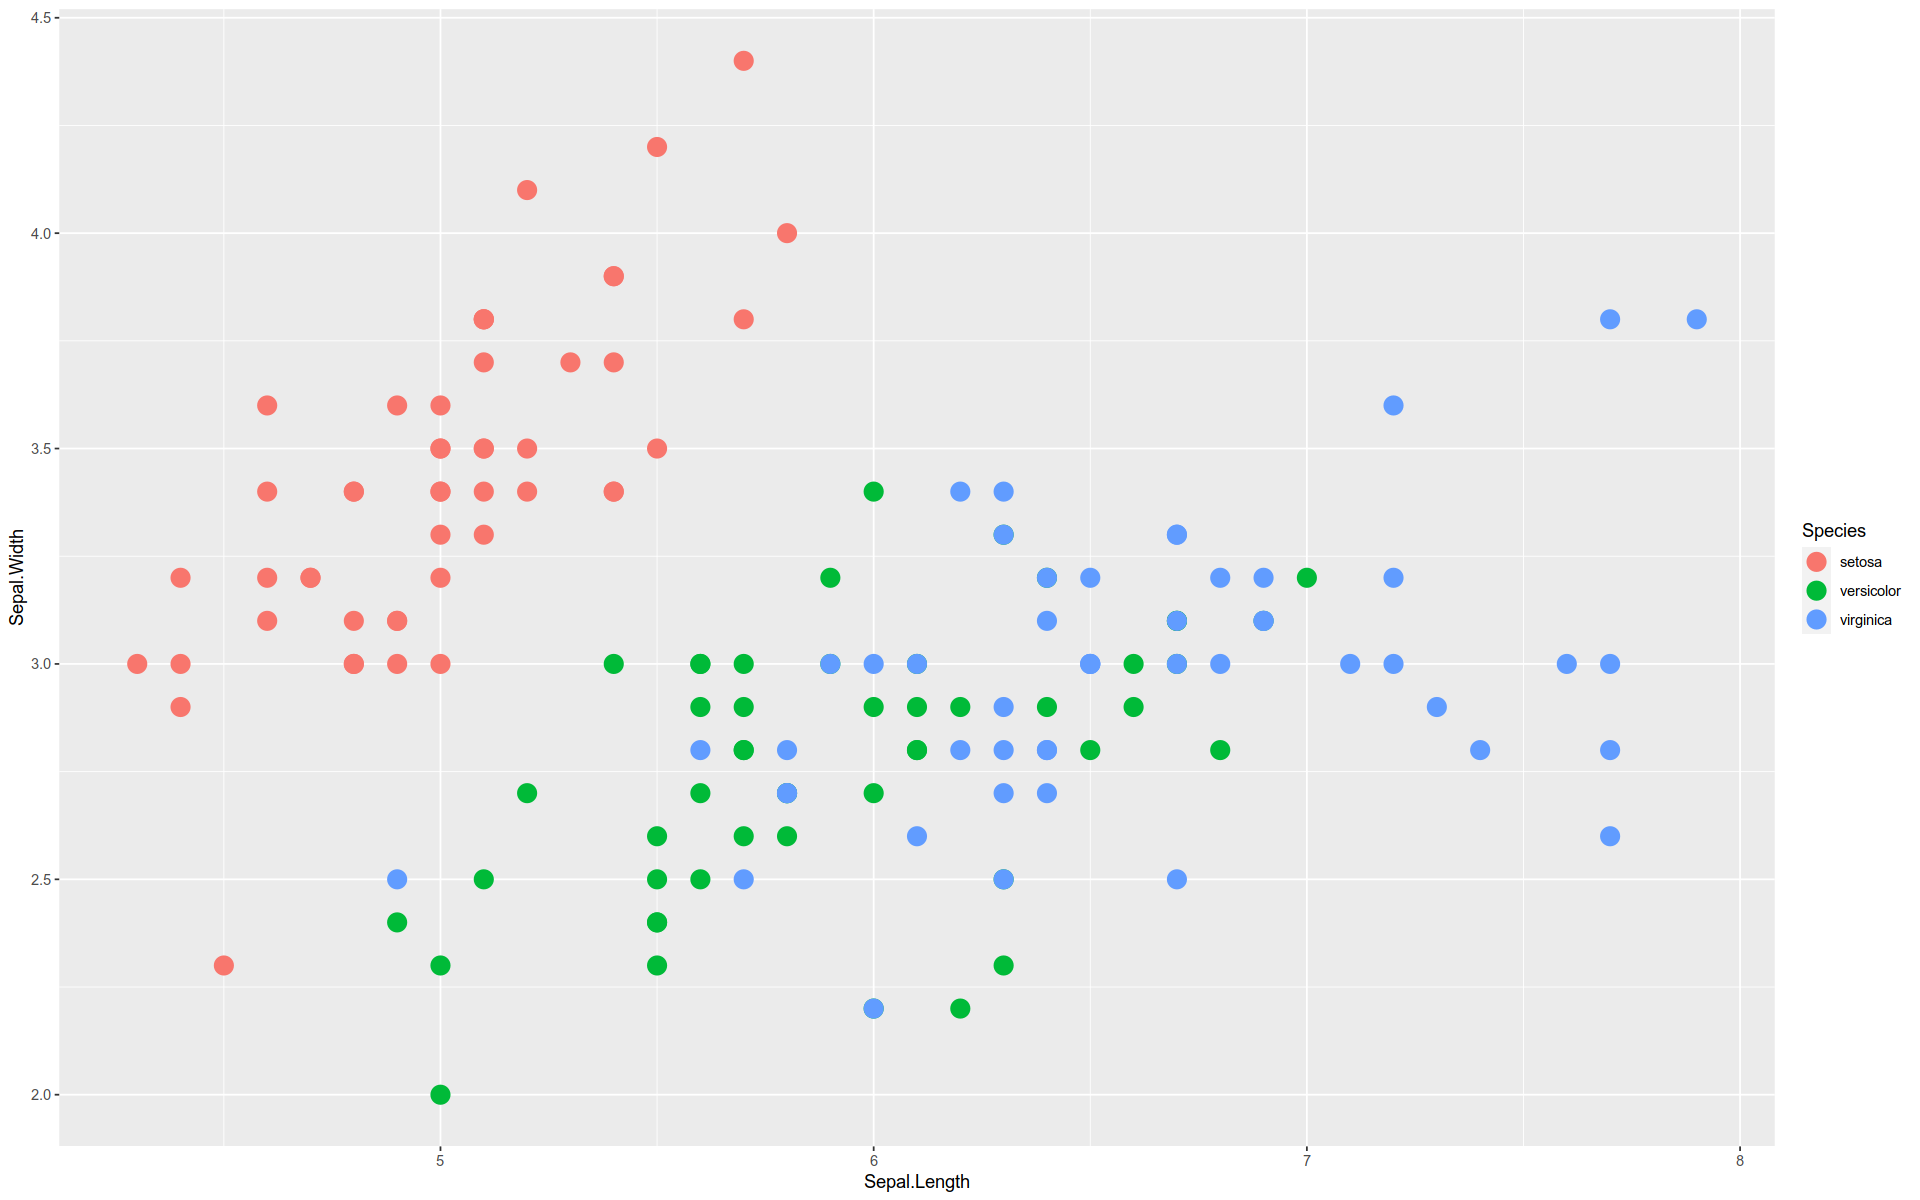

In [22]:
gg <- gg + aes(color = Species)
gg

`geom_smooth()` using formula = 'y ~ x'


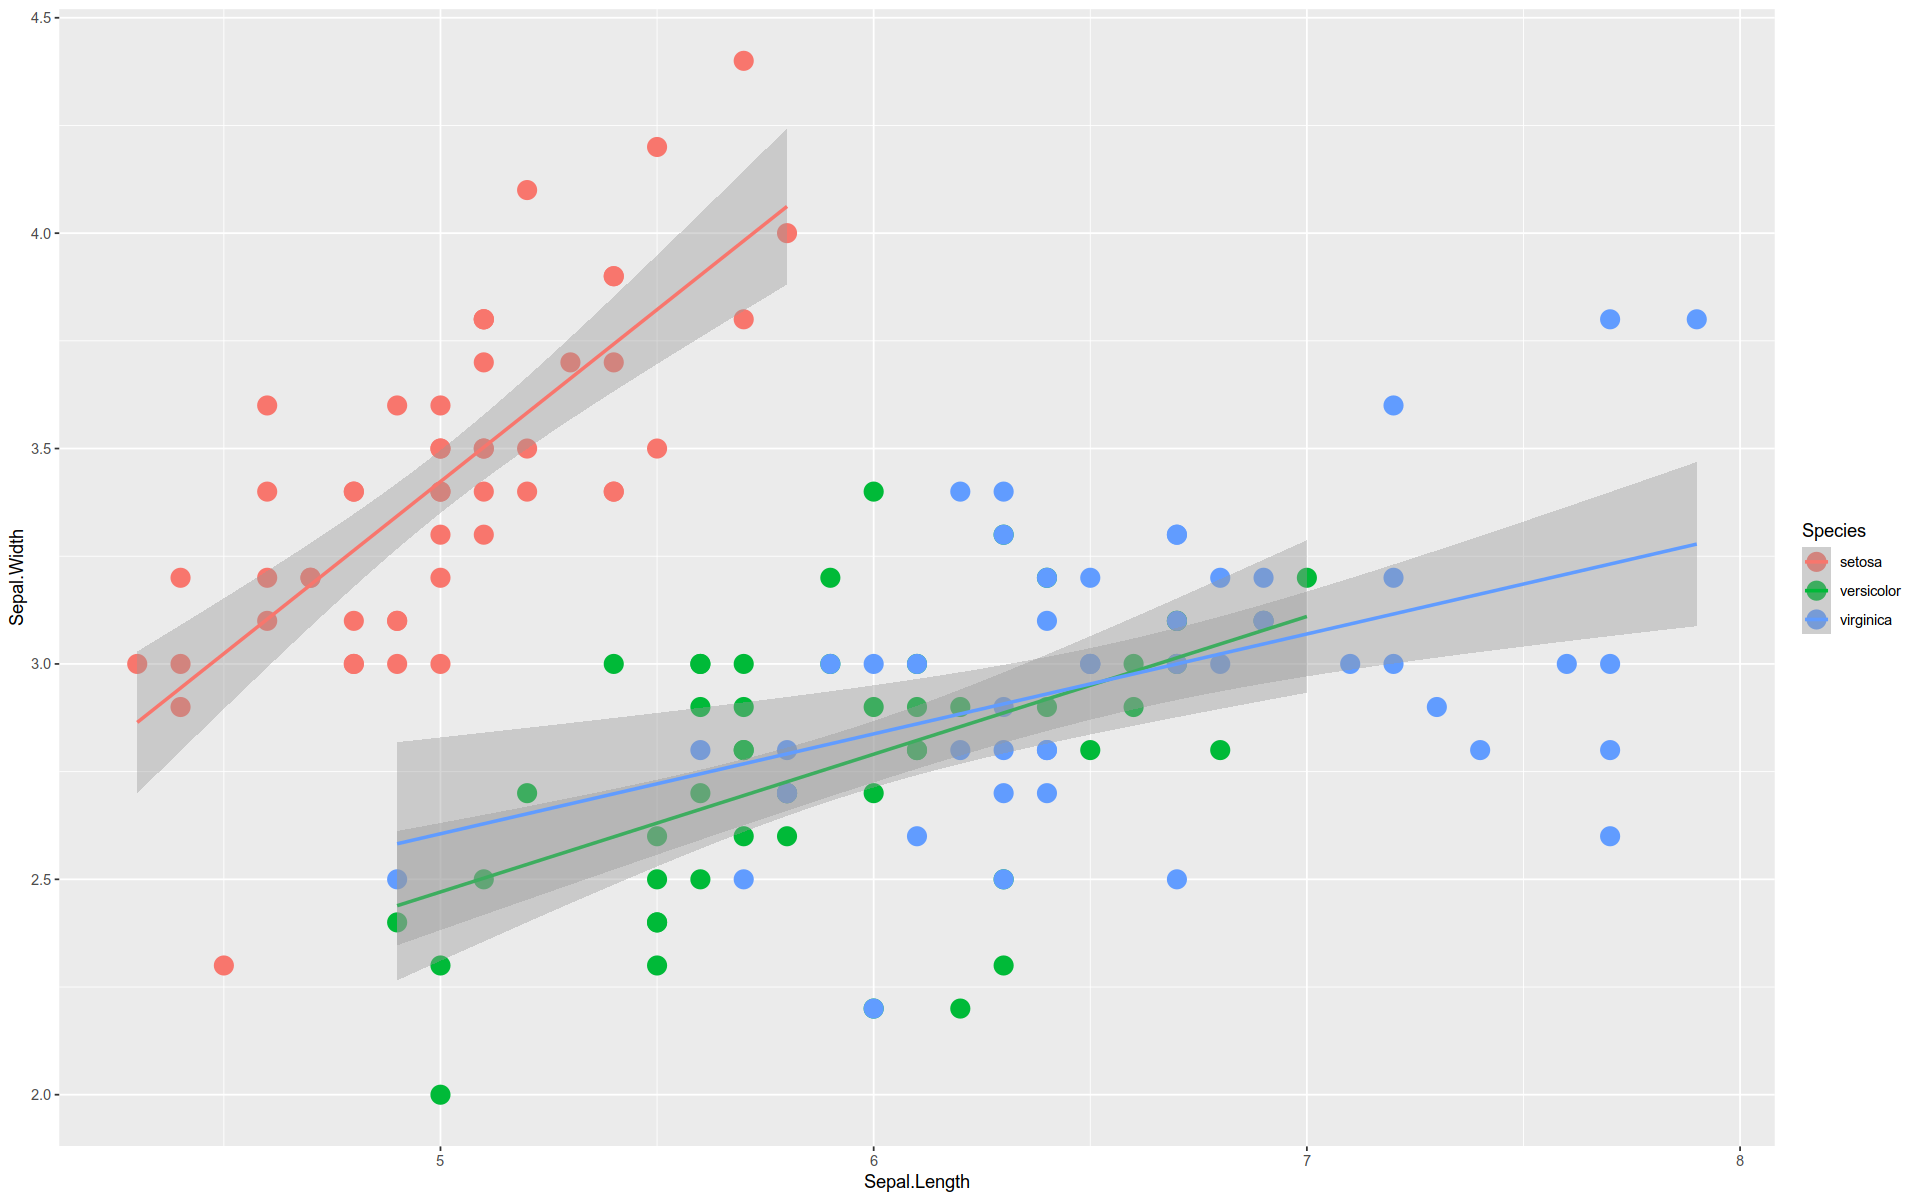

In [23]:
gg <- gg + stat_smooth(method = 'lm')
gg

# Design Pattern

Let's use this ability to assign plots to variables to demonstrate another design pattern.

Often, you will have data of a certain kind and you want to visualize it various ways.

You may not be sure of the most effective visualization, so you want to play around.

For example, you may want to explore the relationship between two continuous variables.

This relationship can visualized using a variety of geometries.

So, we may begin by assigning the basic plot to a variable and then applying different geometries to it.

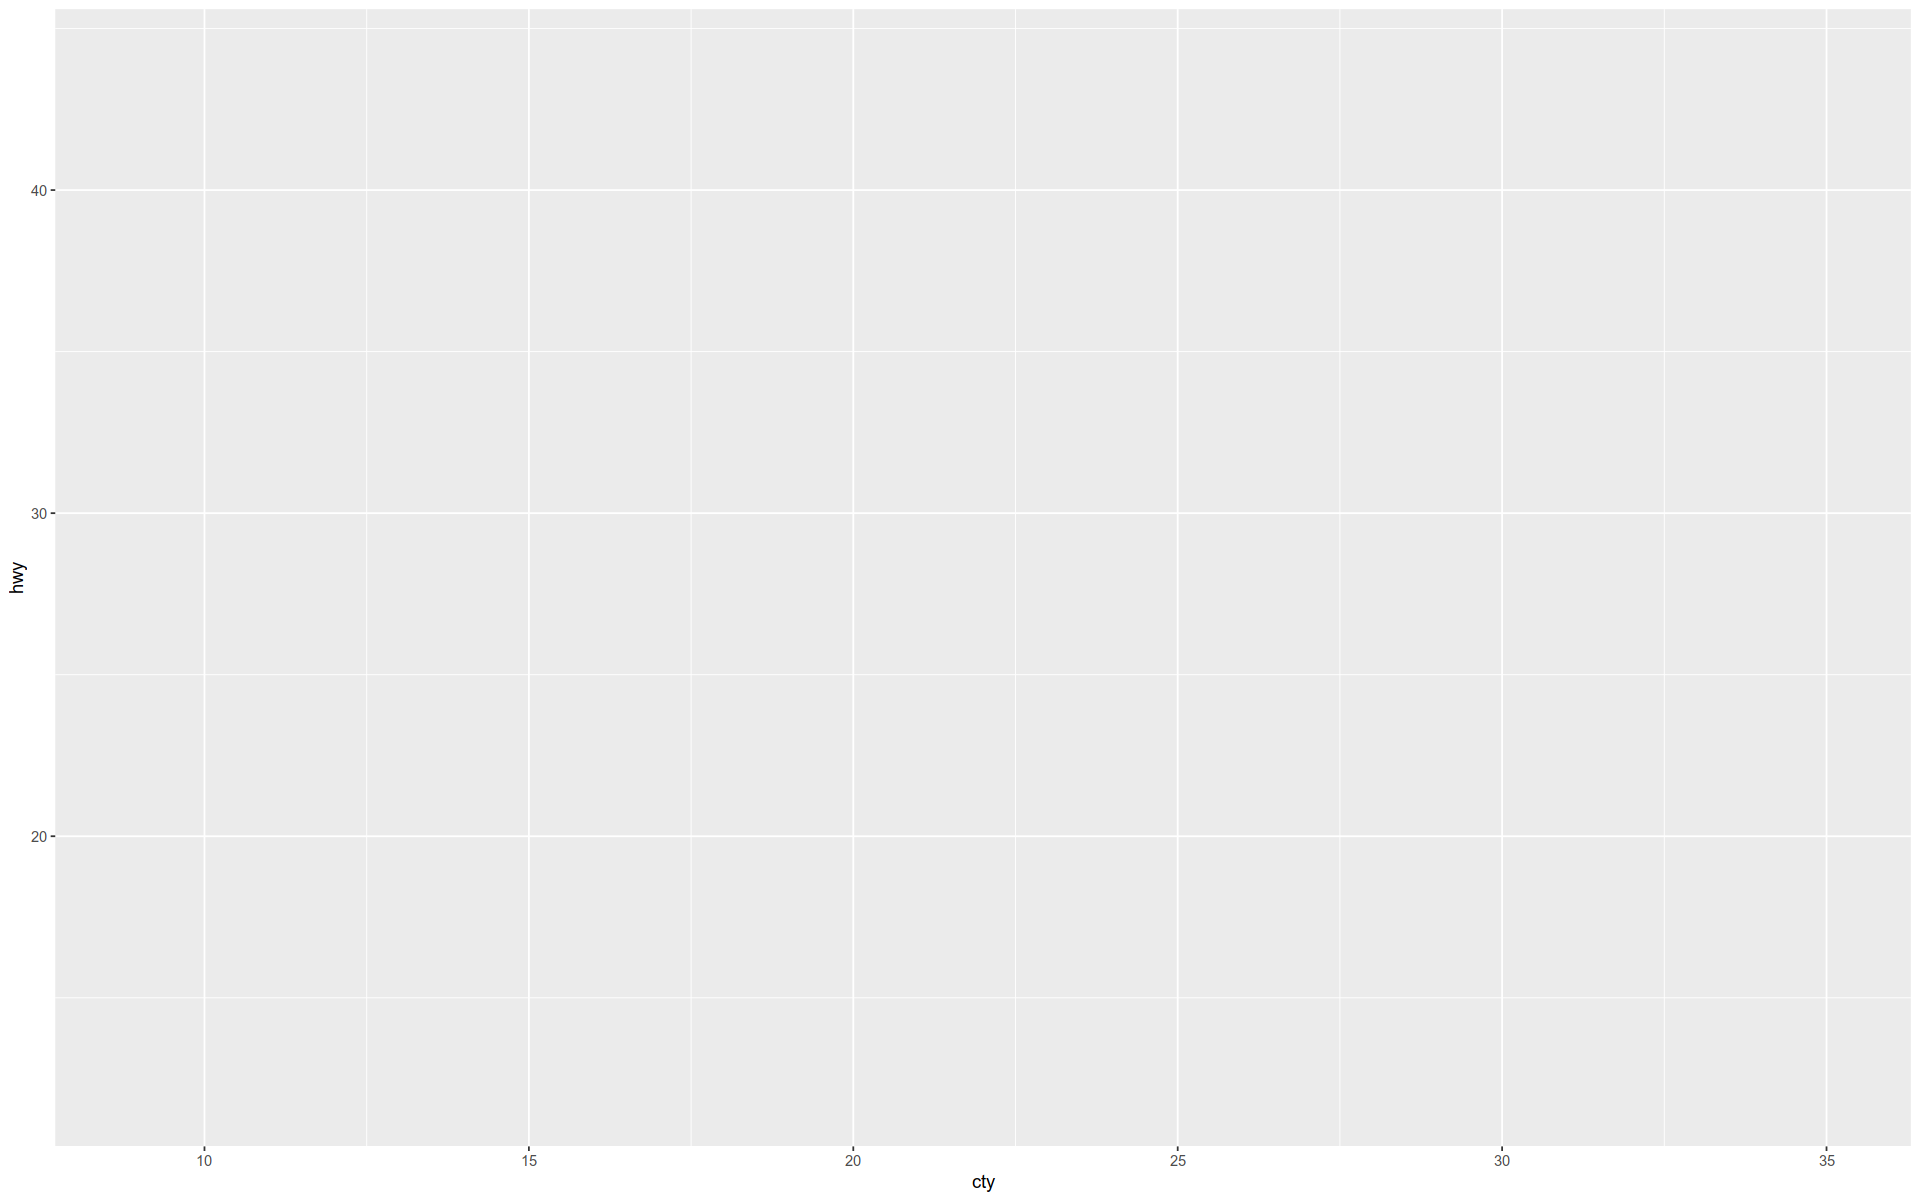

In [24]:
my_gg <- ggplot(mpg, aes(cty, hwy))
my_gg

The object `my_gg` just contains a blank canvas with two labeled and scaled axes.

Here we draw a simple scatter plot by adding a geometry to our object.

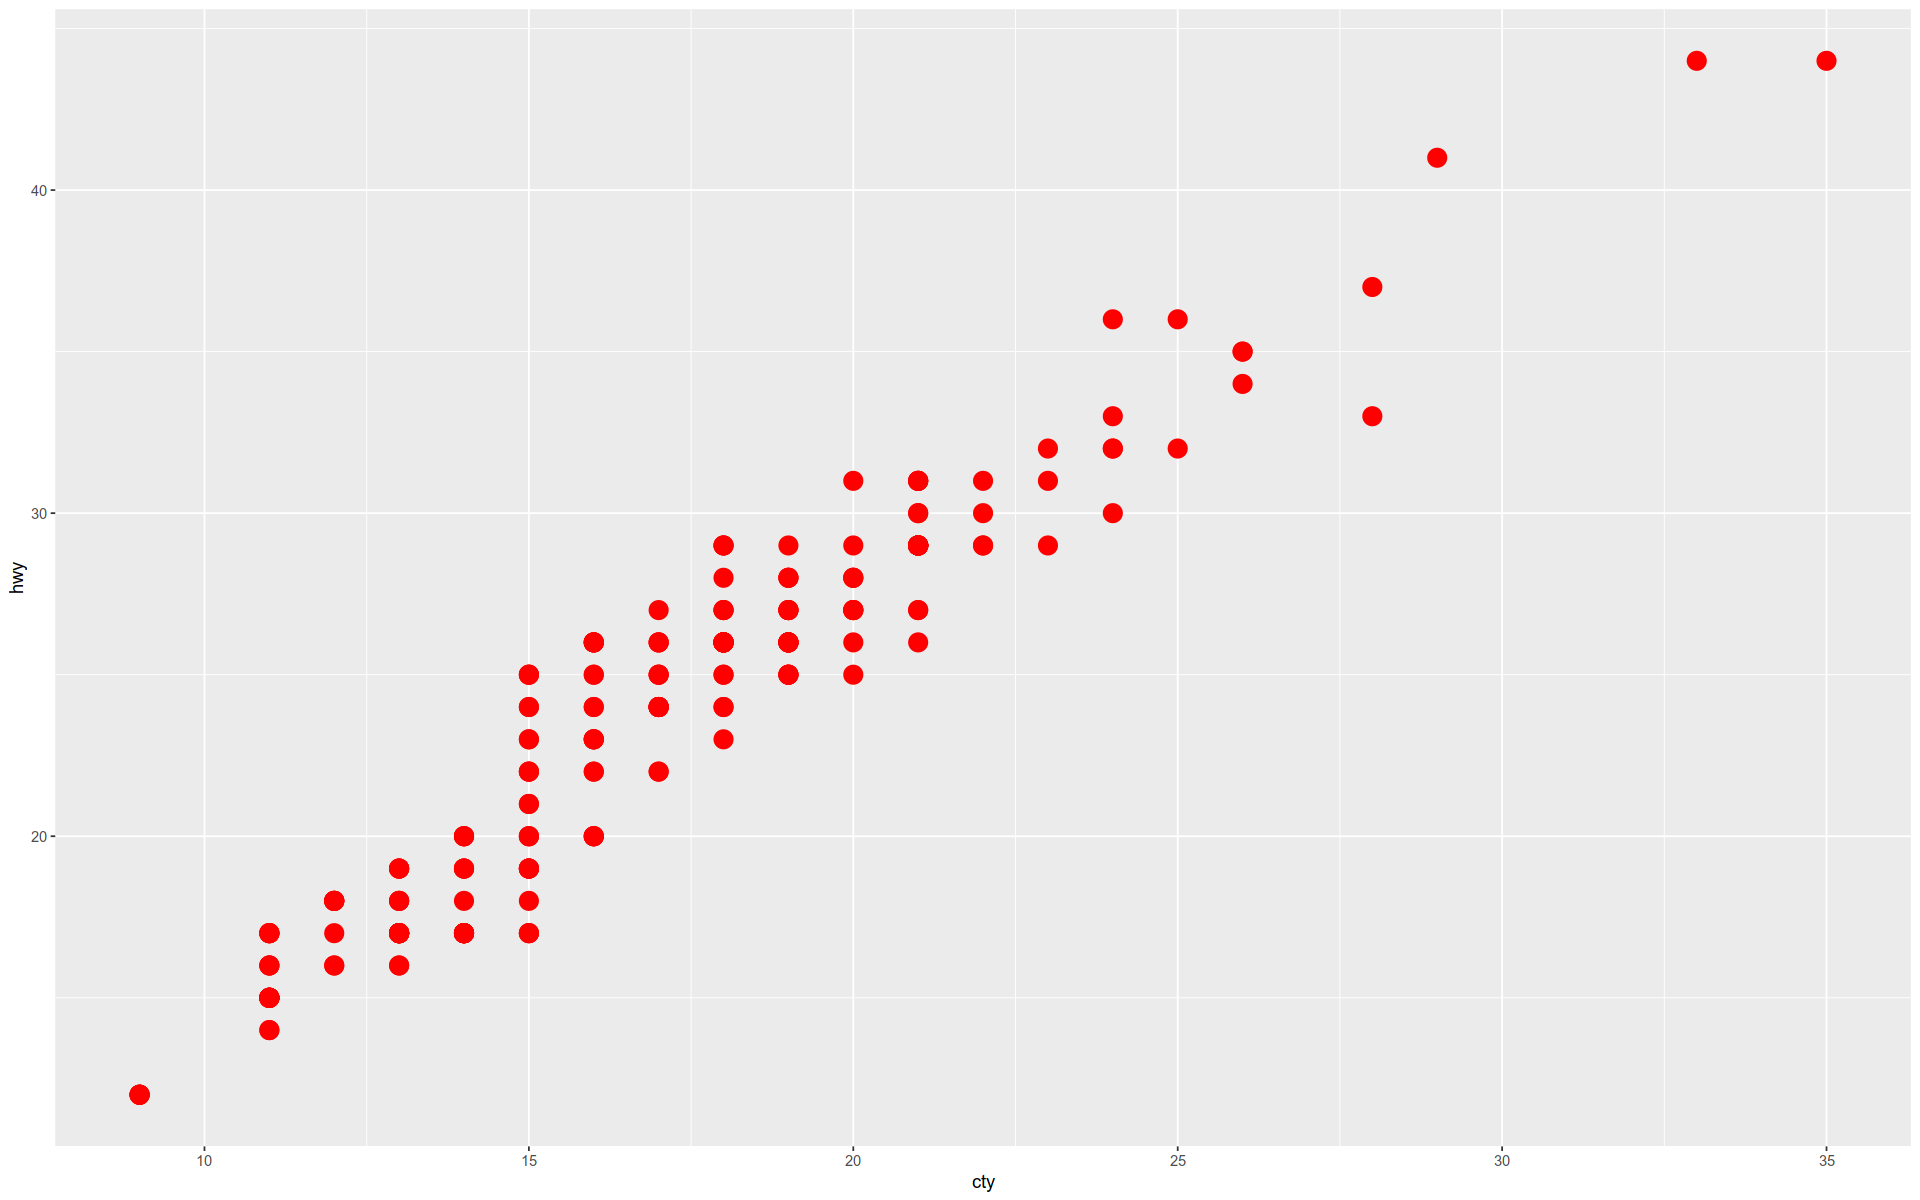

In [25]:
my_gg + geom_point(size=5, color='red')

Here we show the coordinates as text labels showing `cty` with a rectangle background. 

The object remains unchanged by the previous visualization; we are just swapping out geometries.

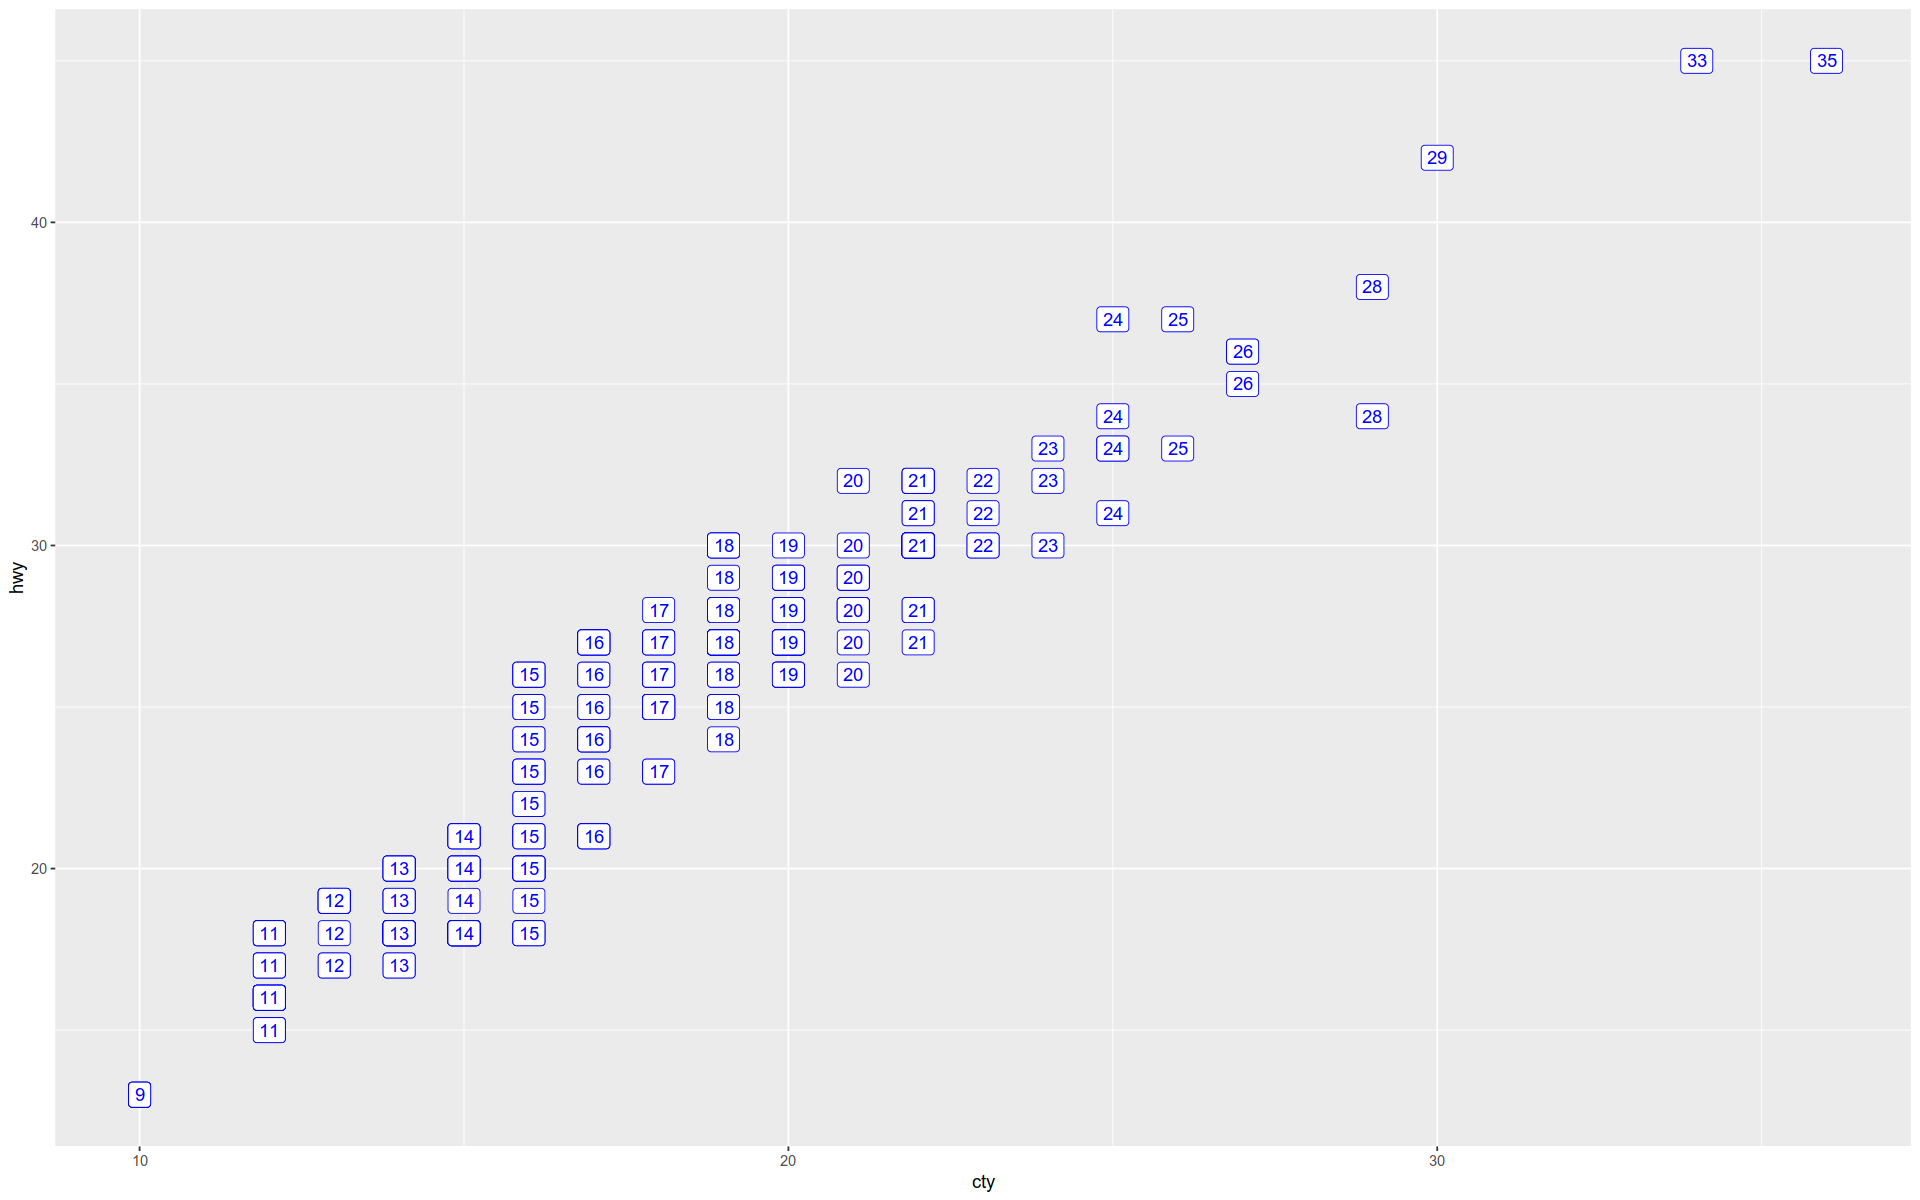

In [26]:
my_gg + geom_label(aes(label = cty), nudge_x = 1, nudge_y = 1, color = 'blue') 

Here is a simple regression line.

`geom_smooth()` using formula = 'y ~ x'


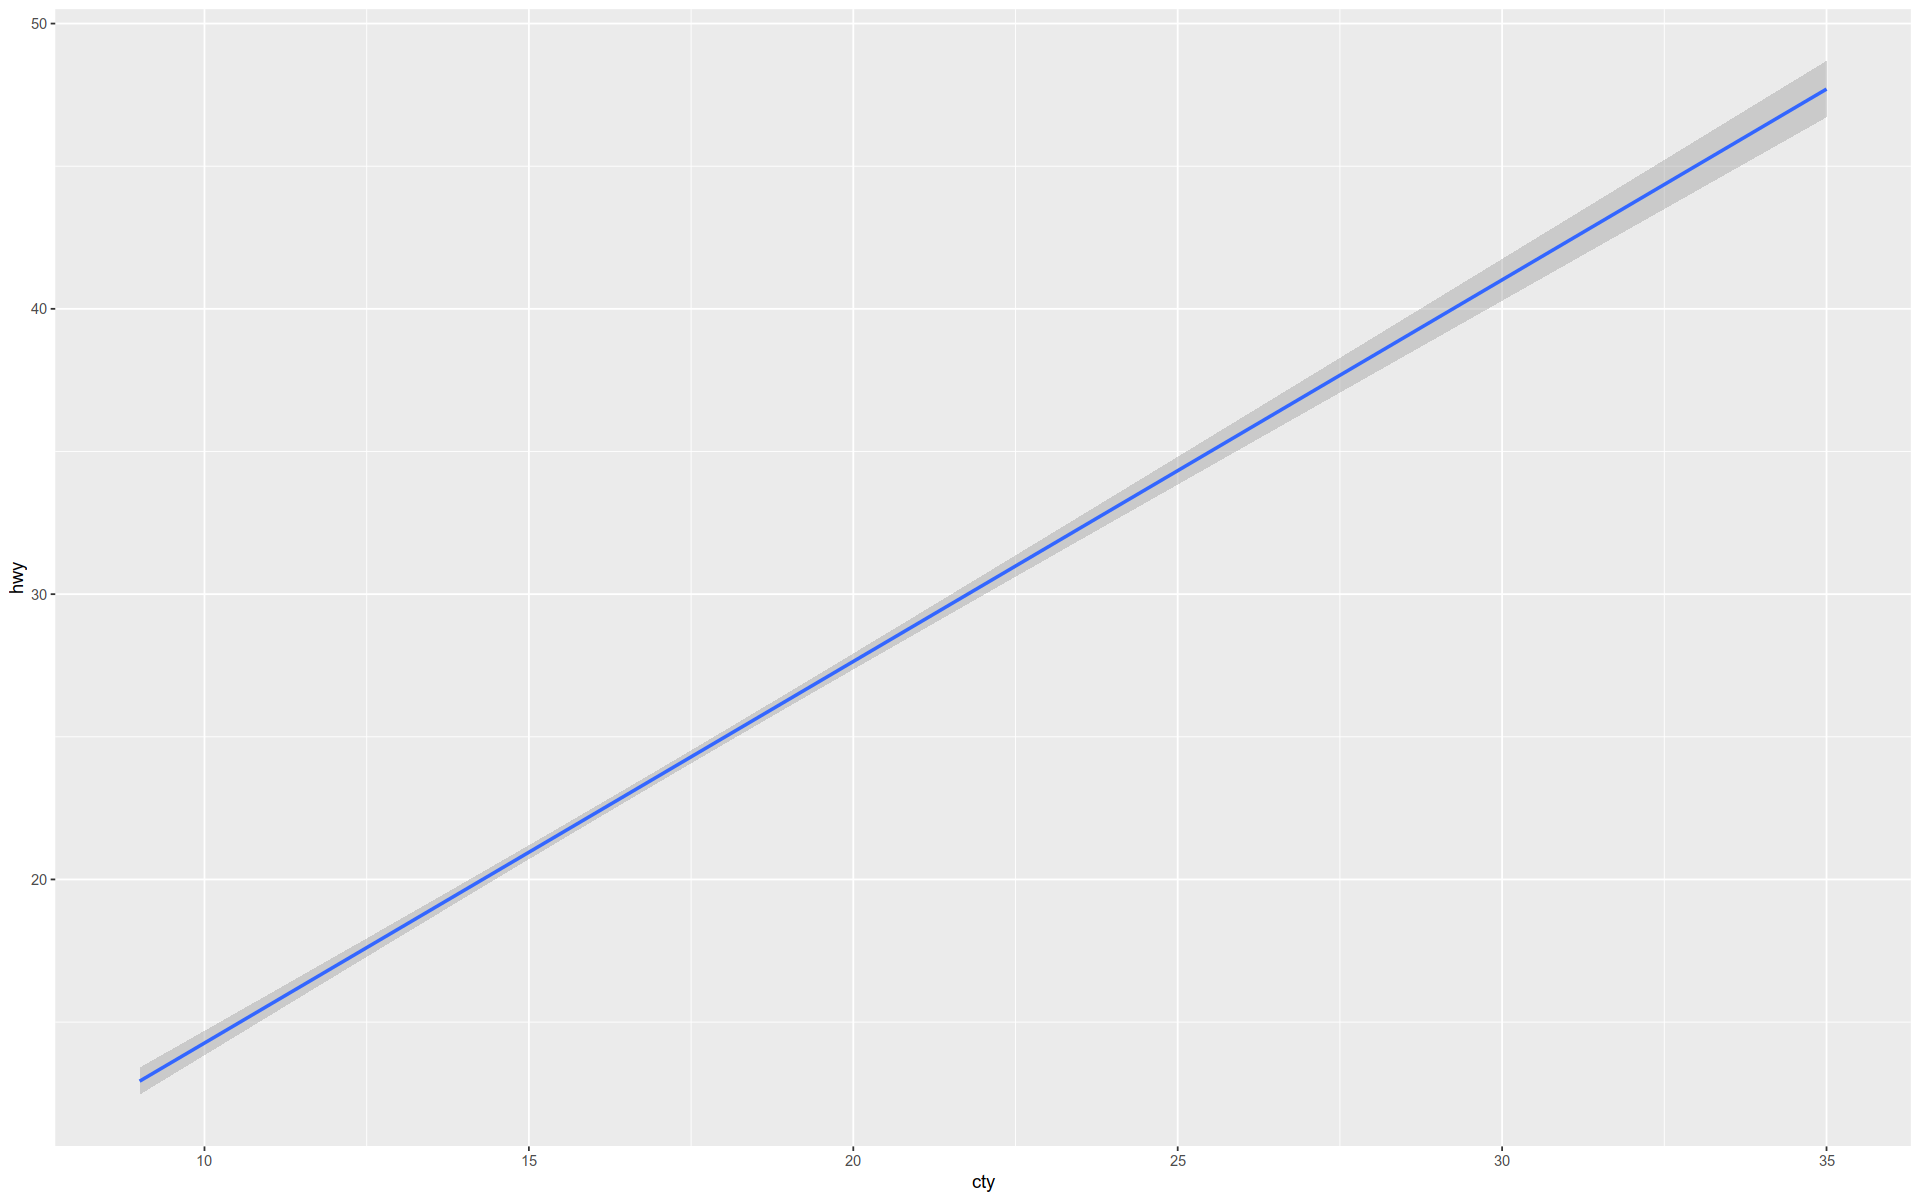

In [27]:
my_gg + geom_smooth(method = lm) 

And here is a boxplot ...

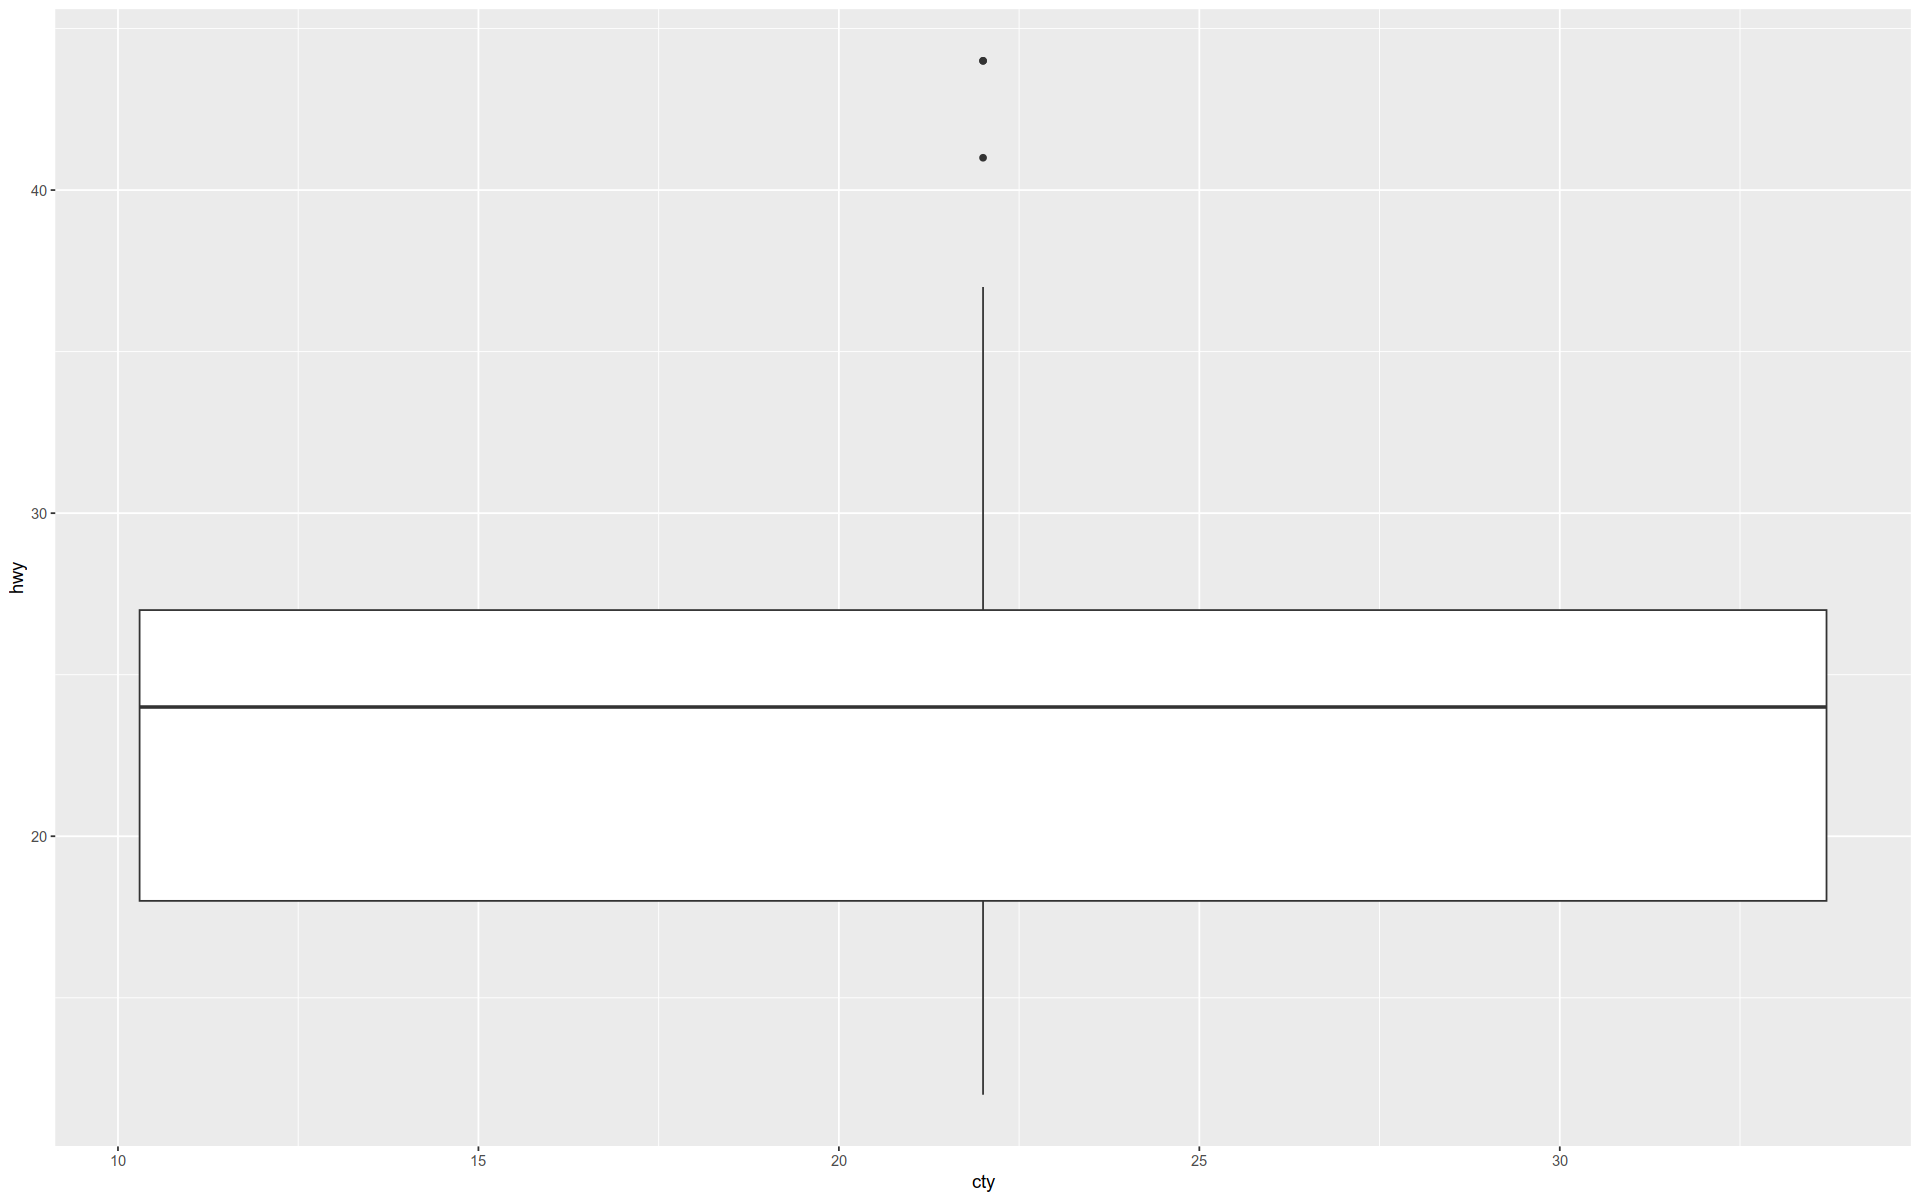

In [28]:
my_gg + geom_boxplot()

The `geom_density2d()` function shows a $2$D kernel density estimation overlaying a scatterplot. 

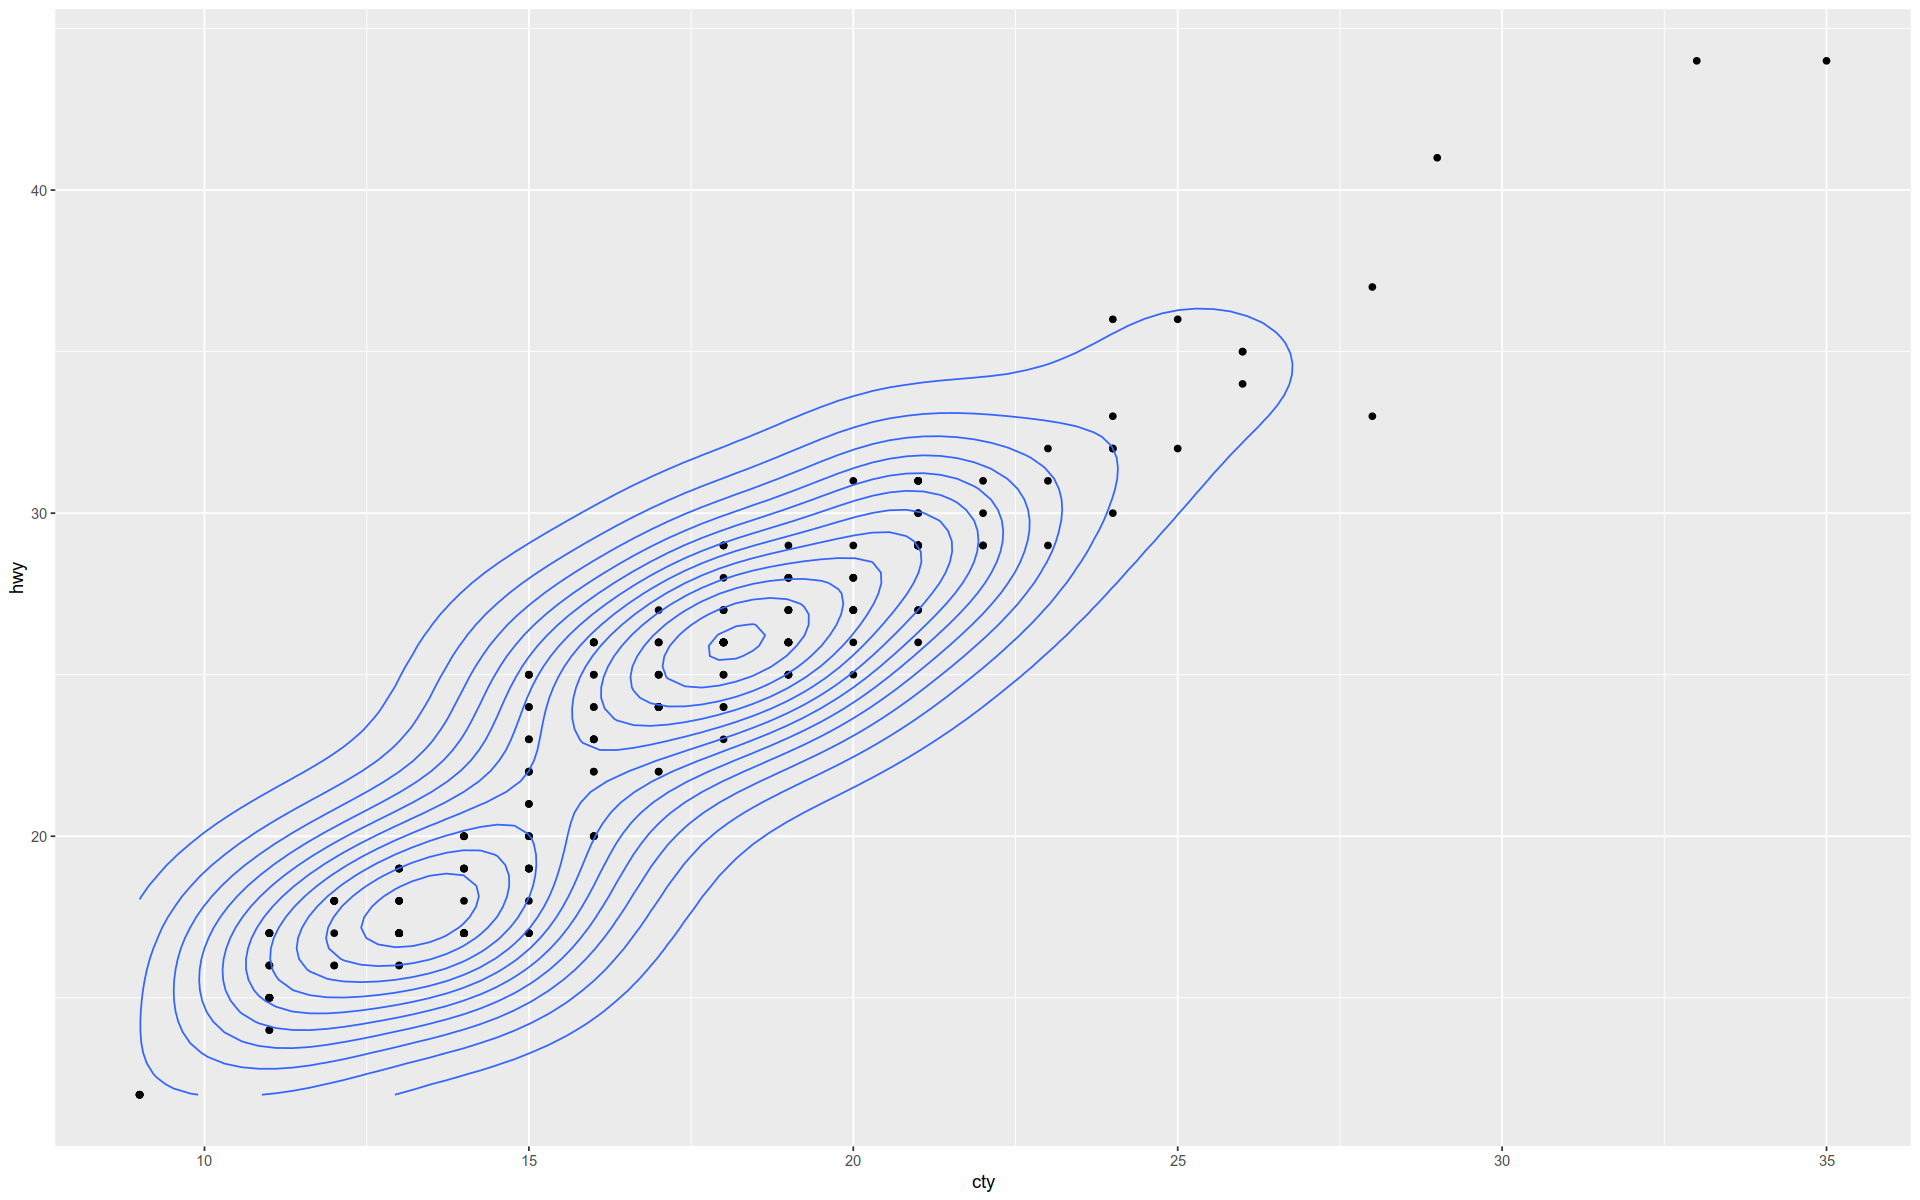

In [29]:
my_gg + geom_point() + geom_density2d()

And here is filled line graph. 

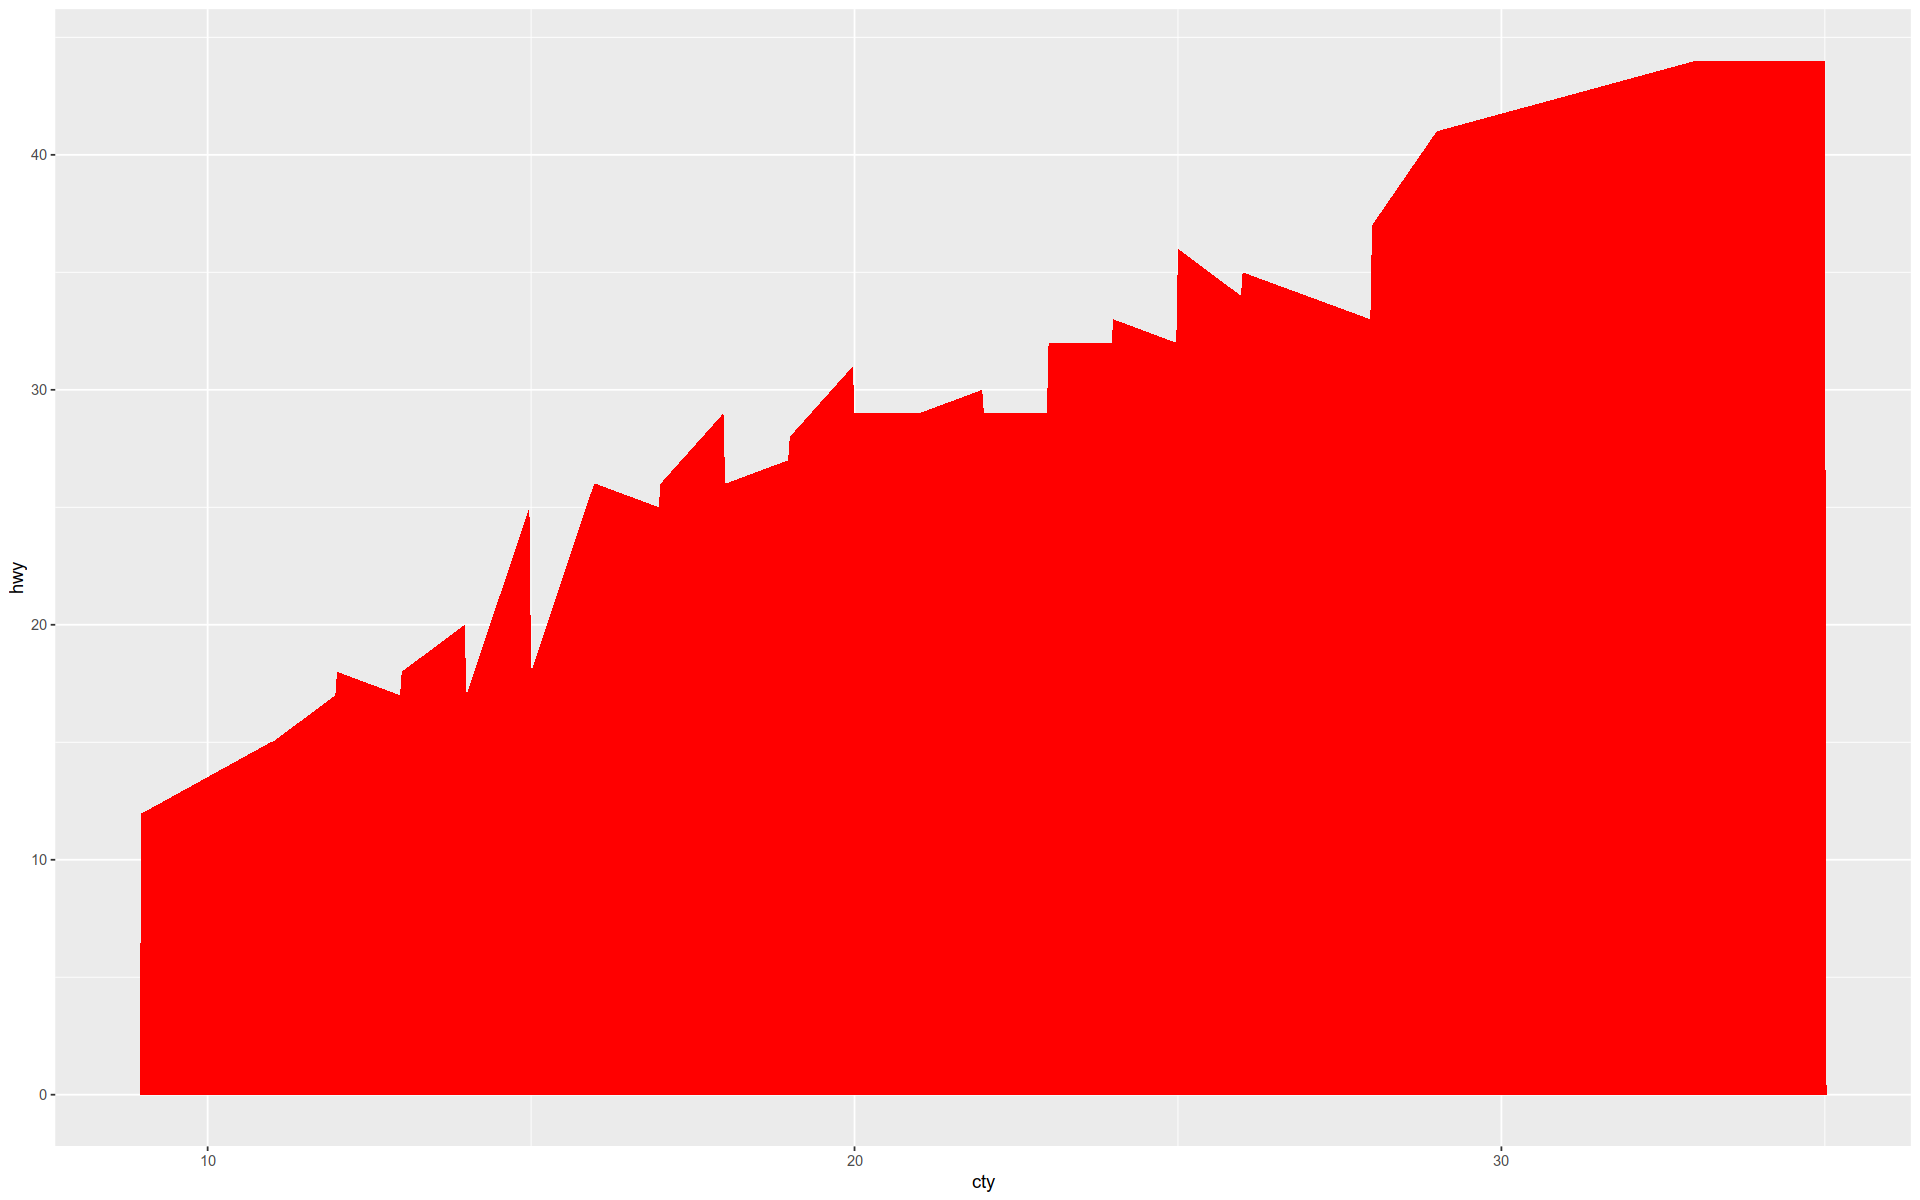

In [30]:
my_gg + geom_area(fill='red')

# Conclusion

This notebook just scratches the surface of what you can do with GGPlot.

There are many other features we have not covered, such as changing coordinates.

In addition, there are many more geometry and statistics layers we have not shown.

However, hopefully you understanding something of the logic of GGPlot and have gained insight into how graphics are built.

This should enable you to make informed guesses and asked effective questions as you develop your knowledge of this powerful toolkit.